In [14]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bootstrap_code.bootstrap_routines import *
import string
import codecs
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [15]:
BS_pattern_list = ['Read More',
            'Read',
            'Read',
            'Follow us on',
            'Follow on in and',
            'Follow on',
            'Where to Find Them',
            'The New Times',
            'For entire News shares',
            'TRENDING ON',
            'BREAKING INSIDERS LEAK',
            'Leave a reply',
            'on 2016 pm',
            '1/10/2/3 Comment',
            'Rate',
            '0 Add Comment',
            'Related',
            'Share',
            'via',
            'Home Foreign Affairs',
            'Submit your review',
            'Bookmark the',
            'For more information on the Shelf Life Extension click the links',
            'References',
            'Leave a comment and let us References 2016. Web. 17 2016.',
            'General Health',
            'Medical Health',
            'Follow elections'
            'Join the conversation with the in ',
            'Download the report and find out .',
            'SF Source Reality 2016 Share',
            'SF Source Wake Up World 2016 Share',
            'SF Source Wake Up World 2016',
            'SF Source Visions of Heaven',
            'REPORTER',
            'Daily Mail',
            'Posted on Tweet',
            'Connect with at and .',
            'Follow on and in development and',
            'Join the conversation with the in and in',
            'The Guardian',
            'Guardian',
            'via Guardian Witness',
            'Follow the Long   on   at or sign up to the long read weekly email The view from',
            'Follow the rest of the results on our politics live',
            'on elections',
            'Why elected elections',
            'Follow on Twitter or Plus . Search',
            'on Twitter or . Search',
            'Search',
            'Share this',
            'shares',
            'first on',
            'post appeared',
            'Related articles',
            'Top Stories',
            'Submit your review',
            'Article first posted at',
            'Let us just hope and pray that makes the right choice.',
            'Make day give this story five no need to register the thumbs are just down',
            'Read more by this',
            'Make T. Loaf\'s day',
            'The New Times',
            '19 ago 3 Views 0 Comments 0 Likes It\'s fair to been shocked by Trump\'s Trump\'s RT LIVE',
            'Posted on 2016',
            'Delivered by The Daily Contributed by of .',
            'This work is reproduced and distributed with the permission of Want to learn more from Sign up for the newsletter here .',
            'And follow us on Twitter to keep up with the latest news and and acute and primary Care.',
            'Join the Professionals Network to read more pieces like this. And follow us on Twitter to keep up with the latest news and',
            'the Social Care Network to read more pieces like this. Follow us on Twitter and like us on to keep up with the latest social care news and Care care adult social Care.',
            'And follow us on Twitter to keep up with the latest news and',
            'Post your answers and new questions below or email them to Please include address and phone and',
            'By A/It/Its/In/J/John/Rose/Blacklisted News/Learn Liberty Anonymity/University of St/Mike/Mint Press News/Nick/West/Tony/Bishop/C. Abbey',
            'Search About Us THE CHRONICLES is your source of unbelievable news.',
            'You can sign up for his free emails at or .',
            'Scroll down to comment Advertisement Popular Right Now',
            'Please share this story on and Twitter and let us know what you think about this',
            'Advertisement story continues below',
            'Submitted by Mike via Liberty Blitzkrieg Thank you I agree more.',
            'Other amount If you wish you make a contribution of or please visit our Support page for instructions Click here for our commenting guidelines On fire',
            'Contributing Writer for Shift Frequency SF Source Infinite Shift',
            'This story may be updated as more information becomes available.',
            'This article was written by and originally published at The Free Thought Project',
            'The Daily Subscribe and stay up to date with daily news important reports and informative videos at The Daily Page',
            'This article was written by Derrick and originally published at Activist .',
            'This article was written by John Vibes and originally published at Activist .',
            'This article was written by and originally published at The Daily .',
            'This article was written by and originally published at Zero Hedge .',
            'This was originally published at .',
            'Our Site Got SHUT DOWN for Story',
            'Daily News Brief from The Daily Channel Watch at forget to share and',
            ' Posted on Tweet Home Silver Silver Coins You must be logged in to post a comment. Today\'s Top Articles Privacy Policy THE ANALYSIS AND DISCUSSION PROVIDED ON IS FOR YOUR EDUCATION AND ENTERTAINMENT IT IS NOT RECOMMENDED FOR TRADING PURPOSES. THE DOC IS NOT AN INVESTMENT ADVISER AND INFORMATION OBTAINED HERE SHOULD NOT BE TAKEN FOR PROFESSIONAL INVESTMENT ADVICE. THE COMMENTARY ON REFLECTS THE OPINIONS OF THE DOC AND OTHER CONTRIBUTING AUTHORS. YOUR OWN DUE DILIGENCE IS RECOMMENDED BEFORE BUYING OR SELLING ANY OR PRECIOUS METALS. WE DO NOT SHARE IN YOUR AND THUS WILL NOT TAKE RESPONSIBILITY FOR YOUR LOSSES AS WELL. Search',
            'Posted on Home Headlines Finance News',
            'Buy 2017 Gold Pandas and Buy 2017 Silver Panda Coins On Secure Your 2017 Panda Coins Today at',
            'Posted on Home Headlines World News',
            'Posted on Tweet Home Silver Silver News',
            'via and sign up for your free weekly Guardian Public Leaders newsletter with news and analysis sent direct to you every Leaders',
            'You your friends Share on Share on   Share via Email View more sharing options Share on Share on Share on Share on Share on Messenger Close Submit quiz of the',
            'You your friends Share on Share on   Share via Email View more sharing options Share on Share on Share on Share on Share on Messenger Close Submit elections',
            'to us on   via and sign up for your free weekly Guardian Public Leaders newsletter with news and analysis sent direct to you every Leaders statement services sector',
            'You your friends Share on Share on   Share via Email View more sharing options Share on Share on Share on Share on Share on Messenger Close Submit',
            'Please LIKE and SHARE this story on or Twitter. Comment on this Article Via Your Account Comment on this Article Via Your Account Follow Us on',
            'Support the Trump Movement and help us fight Liberal Media Bias.',
            'You can follow her on Twitter here and here .',
            'Please review our Comment Policy before posting a comment Please keep your comments on topic with the article. If you wish to comment on another you may search for a relevant article and join or start a discussion there.',
            'Share your thoughts about any conversations had with that voter since the your worries or hopes for the holiday and any other feelings you have about what has been one of most divisive elections. feature a selection of your responses in an upcoming you for your submissions. The form is now but you can see a selection of your elections'
            'En ha a propaganda tan y a en la en la ha y las tan el el para el a el para Read la la en la en la y 1990 y en 1990 en en 1999 en a en 2006 y 2014 y en 2007 y 2011 a y en el 2010 en y Laura Chinchilla en en es las a mayor a el a en a 10 con mayor en la la la con en la las en ascender en la en en el machismo es la hombres  macho hay en en no la las para el alto cargo machismo divide a las en dos seres a y y lo es y en la Y en la el la es En el a la la el a hombres defender y Laura la mayor a y la anterior sea y no en mis y en mi No lo dos la las en las las y en la con y el primer en la Las nos a las y en y Y la en y con el la en Read la era las Y es a a quo y a la o a la la en y las 16 y Tan con en la las a son tan el hombres. el y lo la la e en las y la para o es el a y a en . la con el in in' 
            'Share your views with us using the form',
            'Share your pictures and and browse contributions submitted by others. Posts will be reviewed prior to publication on and the best pieces will feature on the Guardian rights and gender',
            'Share your thoughts and tell us why protesting using the form use a selection in our reporting. Contribute civil',
            'Share your story with',
            'Share your story using the form below. reach out to some readers about including their responses in our ongoing political this is a sensitive please be reassured that we will not share or publish any personal details without obtaining permission elections',
            'Contribute now running a regular weekly photography assignment in the Observer New Review and the next theme is Share your photos of what home means to you and tell us about your image in the description closing date is 3 at 10 am. publish our in The New Review on 6 and in a gallery on the Guardian can share your pictures by clicking on the blue button on this article. You can also use the Guardian and search for and if you add it to the homepage you can keep up with all our is the home of content on the Guardian. Contribute your pictures and and browse reviews and creations submitted by',
            'Contribute now running a regular weekly photography assignment in the Observer New Review and the next theme is Share your photos of what free means to you and tell us about your image in the description closing date is 10 at 10 am. publish our in The New Review on 13 and in a gallery on the Guardian can share your pictures by clicking on the blue button on this article. You can also use the Guardian and search for and if you add it to the homepage you can keep up with all our is the home of content on the Guardian. Contribute your pictures and and browse reviews and creations submitted by',
            'Contribute Trump shattered expectations on with an election night victory that has set the world on a journey into the political in the US or watching from a what do you make of the How are you Share your videos and perspectives by clicking on the blue button on this article or by using the form below. feature a selection of responses in our live is the home of content on the Guardian. Contribute your pictures and and browse reviews and creations submitted by others. Posts will be reviewed prior to elections',
            'Contribute Isle of has won a poll on the most desirable place to live in beautiful island beat off competition from St and to be judged the most dreamed of location for according to the people who took the time to take part in here at would like to know the truth about living on the Isle of Are you surprised that it is considered a good place to What aspects of island life do you most and what are the main drawbacks and difficulties of living your related stories and photos with to your photos and stories by clicking on the blue button on this article. You can also use the Guardian and search for',
            'Share your opinion with us in the comments section.',
            'Share your pictures from visits during all and tell us a little about them including where they were taken and by clicking the blue buttons on this article if they are not appearing on your device by clicking here. compile an gallery from some of our can also use the Guardian and search for if you add it to the homepage you can keep up with all our is the home of content on the Guardian. Contribute your pictures and and browse reviews and creations submitted by',
            'Share your and hopes for the country and use a selection in our reporting.',
            'Share your take the survey here and be part of the research. The short survey takes no more than 10 minutes to complete. The findings will be compared with previous surveys in the series and will be published in the Social Care Network to read more pieces like this. Follow us on  and like us on to keep up with the latest social care news and Care sector',
             'and radio catch up',
            'Post your answers and new questions below or email them to Please include address and phone and',
            '0 419',
            '0 407',
            '2016 elections by BAR editor and columnist',
            '2016 elections by BAR editor and senior columnist',
            '2016 elections by ',
            '2016 presidential campaign ',
            '2016 presidential campaign by BAR editor and senior columnist ',
            'information and analysis from the black left. Submitted by a... ',
            'The Ford on Send by email Help Us Keep Doing This ',
            'Tweet Widget A Black Agenda Radio Commentary by BAR managing editor ',
            'Tweet Widget A Black Agenda Radio Commentary by ',
            'Tweet Widget A Black Agenda Radio commentary by executive editor For Black Agenda . On the go to BAR executive editor can be contacted at .',
            'Tweet Widget by BAR managing editor ',
            'Tweet Widget by Black Power Front',
            'Tweet Widget by And if you think Trump is more evil than or ignorant as fuck and a liberal. can be contacted through her web',
            'Tweet Widget by ',
            'Tweet Widget by MOVE People Move',
            'By . ',
            'You need to login to view this content.'
           'By . Daily reads for 2016.',
            'Merger Total Tops Peak 2007',
            'The Most Interesting Chart In The World Part 1 By.',
            'Share',
            'PLEASE help spread the word by sharing our articles on your favorite social networks.',
            'Don\'t forget to follow the Clothesline on and Twitter. PLEASE help spread the word by sharing our articles on your favorite social networks.',
            'See',
            'Posted on 2016 by Brown ',
            'Posted on 2016 by Daisy',
            'Posted on 2016 by Jack Burns ',
            'Posted on 2016 by Jay ',
            'Posted on 2016 by ',
            'Posted on 2016 by and',
            'Posted on 2016 by Brown Brown is an author and Editor at and . ',
            'Print This entry was posted in Uncategorized . Bookmark the . ',
            '2 shares by 2016 SOCIETY ',
            'by Dean 2016 POLITICS',
            'by 2016 CRAZY LEFT ',
            'by DAILY 2016 SOCIETY DEVELOPING STORY. BREAKING NEWS ',
            '2 shares by DAILY 2016 POLITICS ',
            'shares by 2016 REPORT ',
            'shares by A. 2016 REPORT ',
            'shares by 2016 LIFE ',
            '0 shares by 2016 POLITICS ',
            '6 shares by 2016 POLITICS',
            'shares by DAILY 2016 CRAZY LEFT ',
            'Home News fisher 2 hours ago News World Comments Off on ',
            'This video was sent to us by one of our Sign up to get breaking news alerts from Lynch. Subscribe',
            'Home News fisher 2 hours ago News World Comments Off on ',
            'Home News',
            'News World Comments Off ',
            'Home News fisher 3 ago ',
            'Home News fisher 5 ago ',
            'Home News fisher 6 ago'
            '0 SOURCES AND MIRRORS CAN BE FOUND IN THE DESCRIPTION. ',
            '0',
            'Planet 2016',
            '10 ',
            'Please scroll down for video ',
            'Previous Next ',
            '1 ',
            'Comments',
            'in Technology',
            'in Middle East News US',
            'in Middle East News World',
            'in Middle East News',
            'Comments Back',
            'Report Copyright Violation ',
            'Home POLITICS ',
            'SHARES',
            '4 SHARES ',
            '1 SHARES',
            'Home POLITICS WORLD NEWS 0 SHARES',
            'Home SCIENCE TECHNOLOGY',
            'Home POLITICS WORLD NEWS ',
            'Home SOCIETY US NEWS ',
            '0 SHARES ',
            'Home VIDEO 4 SHARES Post navigation',
            'Home VIDEO 0',
            'Home VIDEO 0 SHARES Post navigation',
            'Home WORLD NEWS 0 SHARES ',
            'Home WORLD NEWS 0 ',
            'Home POLITICS 0 SHARES',
            'Follow on Subscribe by Email Print This Post ',
            'By Posted on ',
            'Financial Markets Gold Market Manipulation Precious Metals Economy',
            'Tweet ',
            'by 2016 ',
            'by A',
            'CLICK HERE. 2015 by . All Rights Reserved. This material may not be or redistributed. linking directly to the articles is permitted and encouraged. About author',
            'CLICK HERE.',
            'GOLD ',
            'About the and . to pm on 2016',
            'Views',
            'Thinker 2016 ',
            'Health 2016',
            'Better than Bob says North . am on 2016',
            'By D. 2016 ',
            'By 2016 ',
            'North has the video .',
            'pm on 2016',
            'Print',
            'Share This ',
            'Posted on 2016 by in Politics Share This ',
            'Share this article',
            'This article was 2016 at am Share this article',
            'Reply Today at PM Part 2 Mother Child Worship Logged The answer to 1871 is am one of the not a fictional entity created by an incorporated state issued Birth Certificate.',
            'Reply August PM ',
            'Reply PM ',
            'on Contact Us',
            'Add Comment',
            'We Are Change By ',
            'We Are Change ',
            'Share on ',
            'Share on News ',
            'posted by ',
            'Posted on 2016 by in Health 0 Comments ',
            'Posted on 2016 by in News US 1 Comment ',
            'Posted on 2016 by in News US 0 Comments ',
            '2 Comments',
            '0 Comments',
            '2016 PM 0 SHARES ',
            '2016 PM 0 Submitted by via',
            '2016 PM 0 SHARES',
            'Twitter Why elected elections ',
            'Share on on via more sharing on on on on on ',
            'For entire News shares',
            'More Related',
            'TRENDING ON',
            '1. ',
            '1 link ',
            'link a reply ',
            'link',
            'edit on 27-10-2016 by grammatical error correction.',
            'edit on 27-10-2016 by reason',
            'Thanks for reading.',
            'edit on by reason edit on by reason',
            'Thanks for your',
            '10 5 0 ',
            '10 1 0 ',
            '11 9 0 ',
            '14 0 0 2 ',
            '15 8 0 ',
            '18 0 0 1 ',
            '2 0 0 ',
            '20 18 0 ',
            '2',
            '22 20 0 ',
            '20 16 0',
            '22 18 0 ',
            '22 13 0 ',
            '23 18 0 ',
            '3 ',
            '0 0 ',
            '5 ',
            '68 0 0 1 ',
            '20 13 0 ',
            'ago 0 ',
            'THE DAILY MAIL ',
            'NEWS ',
            'GLOBE ',
            'NEW POST ',
            'MEDIA ',
            'TIMES ',
            'UPLIFT CONNECT ',
            'TODAY',
            'Last 5 posts by',
            'Share This ',
            'Read more by',
            'has worked',
            'Read more by',
            'Store 4 2016',
            'Store 2 2016',
            'Store 6 2016'
            'Store 29 2016',
            'Store 30 2016',
            'Store 31 2016',
            'The Daily encourage you to share and republish our breaking news and videos Click for details',
            'Click for details',
            'by in News US  ',
            'in News US   ',
            ' by in News US 4  ',
            'in News World   ',
            'Contact Us ',
            'Twitter',
            'Share on on via more sharing on on on on on ',
            'PM',
            'Here\'s something interesting from The Review... Recipient Name Recipient  ',
            ' by in   ',
            ' by in News US Comment',
            'RELATED CONTENT',
            'in Conspiracies',
            'Comment',
            'posted',
            'About Archive',
            'ANNOUNCEMENT',
            ' THE RETAIL ',
            ' THE WORLD',
            'THE',
            ' ITS',
            'IN',
            'We Use Our policy BREAKG SPORT ',
            'We Use Our policy BREAKG LIFESTYLE',
            'We Use Our policy BREAKG HEALTH',
            'We Use Our policy BREAKG ENTERTAMENT',
            'FOLLOWG',
            'post Page of 4 ',
            'Waking Times',
            'East and North',
            'Recommended For You',
            'Join the Professionals Network to read more pieces like this. ',
            'East You your friends      Email View more sharing options      Messenger Close Submit quiz of the ',
            'By ',
            'by Ticker',
            'by Click for more article.. More Stories Ticker',
            'by ',
            '7',
            '3',
            'Radio  ',
            'Radio ',
            'There are currently',
            ' below why not add your',
            '9',
            '9 ',
            ' SHARE THIS ARTICLE',
            ' Stay tuned for more updates here at',
            'POLITICO ',
            'POST ',
            'ANTIWAR ',
            'more by',
            'Last posts by',
            'Last posts by',
            'By Jay ',
            'By John Vibes',
            'By John ',
            'By Mike  ',
            'By Nick ',
            'By ',
            '6 4  ',
            '4   ',
            '434  ',
            '7 4  ',
            'much more is available for consideration at .',
            'Recommended For You',
            'MORE...',
            'TRUTH REVOLT ',
            'DAILY MAIL',
            'PRESS US ',
            'ALL GOV ',
            'TIME ',
            'DEPENDENT ',
            'EXPRESS ',
            'This article was writtenJay and originally published at The Free Thought Project ',
            'DAILY CALLER',
            'Video',
            'ANTIWAR ',
            'John Vibes  ',
            'COPYRIGHT P. DISTRIBUTED BY  more by',
            'Store 7',
            'Store 3',
            'Store 6 ',
            'Store  ',
            'RELATED',
            ' pm ',
            ' am ',
            'VIDEO',
            'to share and republish our breaking news and videos ',
            'post Now View Full Text of Job Postings appeared  .',
            'HELP US GET  WORD OUTLOOK FOR US ON',
            'This Post Editor CONTACT ',
            'Home US News',
            'Articles WOW Host Posts MISLEADG Headline',
            'Watch a clip from todays which includes Pope  Featured image  Images  this',
            'Images  this',
            'lives in New and can be reached  at',
            'BAR editor and senior columnist',
            'BAR executive editor',
            'BAR',
            'BAR executive editor can be contacted at .',
            'Production in the Service of Humanity in Renaissance',
            'Production in the Service of Humanity in Renaissance',
            'Production in the Service of Humanity in',
            'MOVE ',
            'Timothy ',
            'Zero Hedge',
            'Fox News ',
            'Observer ',
            'Underground Reporter ',
            'Counter Current News',
            'Liberty Blitzkrieg ',
            'Trending Trending ',
            'New Times',
            'Activist Post ',
            'Email Print ',
            'Advertisement',
            '8.1.photo',
            'Loading ...',
            'Press reports from ',
            'SF Source Virtue',
            'Harper',
            'Griffin Insider ',
            'Guest Posts',
            'Here\'s something interesting from The Review... Recipient Name ',
            'Editor\'s Note',
            'Videos ',
            'Share',
            'Written by ',
            'Dear',
            'This story may be updated as more information becomes available.',
            'This article was written by Smith and published at his site.',
            'Delivered by The Daily Contributed by of The Daily .',
            'Delivered by The Daily Contributed by of Of Two Minds .',
            'Follow on Twitter and now on Share',
            'Home Badge Abuse 2016 Leave a comment',
            'This post was originally published on this site ',
            'Related',
            'Donate',
            'Written by Email',
            'Delivered by The Daily Contributed',
            'By on 2016',
            'By 2016',
            'By on 2016 2016 Dog Poet Transmitting . ',
            'The Independent',
            'Archives',
            'Home',
            'LINK ',
            'For more please view the following video',
            'posted by A ',
            'Delivered by This content may be freely reproduced in full or in part in digital form with full attribution to the author and a link to',
            'Previously tweeted call for against after police shootings 11 ago A former congressman on threatened to grab his musket if nominee Trump loses the presidential election. On voting for former Rep. tweeted on On if Trump grabbing my Previously tweeted call for against after police shootings 15 ago On if Trump grabbing my',
            'Receive commentaries in your email By signing up for you will also be signed up for news and special offers from via email. Name',
            'with the Friends Service Committee as the Program Director since 2010.',
            'Distributed by.',
            'Reprinted from the Institutes weekly review of the available exclusively to subscribers. Subscribe for free to Updates. Read more by',
            'Contact him at or visit his website at . Reprinted with permission from . Read more by',
            'COPYRIGHT 2016 P. DISTRIBUTED BY Read more by',
            'Saker No current Saker messages.',
            'Mainstream Media Multimedia Propaganda Sleuth Journal Special Interests US News',
            'Mainstream Media Politics Propaganda Sleuth Journal',
            'Mainstream Media Politics Propaganda',
            'Medical Health Multimedia Natural Medicine Sleuth Journal Special Interests ',
            'Behind the headlines ancient mysteries and more. Real news and perspectives that you won\'t find in the mainstream media. Home Essential Reading',
            'Multimedia Science Technology Sleuth Journal Special Interests',
            'Multimedia Politics',
            'Multimedia Science Technology',
            'Multimedia US News The Real Agenda News',
            'Politics Sleuth Journal Special Interests',
            'Article first posted at Submit your review',
            'Politics War Propaganda',
            'Activists Special Interests US News',
            'Special Interests US News',
            'War Propaganda World News',
            'The Scandal',
            'Occidental Observer',
            'The Review',
            'Posted on Tweet ',
            'Posted on Tweet via Today ',
            'Posted on Tweet via',
            'Here\'s something interesting from The Review... Recipient Name',
            'Recipient Email',
            'Posted on Times',
            'from Sputnik News',
            'We Are Change',
            'Waking Times',
            'Posted on 2016 by',
            'Leave a reply',
            'The Episodes by',
            'The Episodes',
            'US News',
            'BUSESS DAY',
            'Browse  Jobs or sign up to  Careers for the latest job vacancies and career in',
            'UNITED NATIONS',
            'BY',
            '64 SHARE',
            'All content copyright The Above',
            'edit 6-1-reason',
            'Tony geopolitical researcher and especially for the magazine New Eastern Outlook .',
            'Follow',
            'August 8',
            'Send tips to .',
            'ECONOMIC COLLAPSE',
            'REVIEW',
            'This article was publishedInstitute .',
            'and report for The Register. Follow them and . reports for  in',
            'Follow A.',
            'Follow him here .',
            'Latest News ',
            'Notes',
            'and Nick  This Originally  at . ',
            'You your friends      Email View more sharing options      Messenger Close Submit quiz of the',
            'If you have any questions or comments about this please email ',
            'you need advice a work For and send a brief email to Please note that he is unable to answer questions of a legal nature or to reply at ',
            'Email us at or write to Consumer the 9 Please include a daytime phone ',
            'Email me in the ',
            'Contribute your pictures and and browse reviews and creations submittedothers. Posts will be reviewed prior to ',
            'Email us at or write to Consumer the 9 Please include a daytime phone ',
            'Browse  Jobs or sign up to  Careers for the latest job vacancies and career Q and ',
            'you need advice a work For and send a brief email to Please note that he is unable to answer questions of a legal nature or to reply publishing and public',
            'Email us at or write to Consumer the 9 Please include a daytime phone',
            'and if your thing you can follow Big Website Big Social AND',
            'You your friends      Email View more sharing options      Messenger Close Submit quiz of the ',
            'follow Big Website Big Social AND ',
            'you need advice a work For and send a brief email to Please note that he is unable to answer questions of a legal nature or to reply',
            'For and send a brief email to Please note that he is unable to answer questions of a legal nature or to reply ',
            'you need help email at or write to Your The Kings 9 Include an address and phone problems with',
            'Email it to',
            'The Kings 9 or email regrets she cannot enter into personal  ',
            'Email us at or write to Consumer the 9 Please include a daytime phone ',
            'you need help email at or write to Your The Kings 9 Include an address and phone number',
            'nd if you have an idea for a please read our guidelines and email your pitch to us at Education',
            'a work the higher education network for more analysis and job direct to your   And if you have an idea for a please read our guidelines and email your pitch to us at Education',
            'Email us at or write to Consumer the  Please include a daytime phone ',
            'on am',
            ' You can contact him  email at'
            'Article'
            'If you notice any sign if possible voter fraud or election call the Trump Ballot Security Project toll free 1-855-45-464 or email',
            'Receive commentaries in your email signing up for you will also be signed up for news and special offers from  email. Name',
            'DELETER OF  FREE WORLD Files backed up multiple platforms never ago',
            'SEARCH  SITE',
            'Editors',
            'SHARE',
            'Notify me of commentsemail. Notify me of new postsemail. PLEASE DONATE TO KEEP E NAKED UP AND RUNNG. Choose DONATE for donation or SUBSCRIBE for monthly donations Payment Options GET ALL NEW ON TWITTER Subscribe to  Email Enter your email address to subscribe to this and receive notifications of new postsemail. Email Address',
            'Don\'t forget to follow the Clothesline and .  ',
            'Leave a comment...',
            'Click the button to subscribe.',
            'Learn more Click Here ',
            'In return you get our email newsletter compiling the best of The Post several times a week.',
            'AUTHORS PLEASE COMMENT AND DEBATE DIRECTLY ON OUR GROUP ABOUT  AUTHOR',
            'amLeave a',
            'EXCLUSIVE',
            'is the Director of the AIM Center for Investigative Journalism and can be contacted at View the complete archives from .',
            'He can be contacted at . View the complete archives from . ',
            'Stay updated',
            ' Items owns and at . She is a Constitutional Conservative and focuses political and national issues of interest to the public. is the editor at New Zeal . She also does research at . You can . can be found and  .',
            'Articles',
            'Previous post',
            'FOR ENTIRE ARTICLE CLICK LK',
            'Ad',
            'As The World Awaits The Election Buckle Up For Some Rough Times',
            'You may know him Daily as in .  him  or connect with him . Click here to buy a Connect',
            'This article originally appeared',
            'Join Hunter as he talks about these stories and more in the Weekly News SF Source Watchdog ',
            'If you spot a please email the error and name of the article to .',
            'Learn',
            'Social Trending',
            'He can be reached at This email address is being protected from You need enabled to view it. .',
            'DONATE NOW DOWNLOAD  MOBILE CLICK',
            'Got a news Email us at Help support the ministry of with your or monthly gift of financial support. DONATE NOW DOWNLOAD  MOBILE CLICK  Support to help build a global news network that provides a credible source for world news We believe need and deserve their own global news network to keep the worldwide Church and to offer a positive alternative to the bigotry of the mainstrenews media ',
            'Please LIKE and SHARE this story or .',
            'BREAKG',
            'Breaking News',
            'CLICK',
            'Posted at',
            'Leave a ',
            'Copyright 16',
            'You can contact him  email at',
            'is an activist and author from He enjoys writing about and the media. Send him an email at',
            'You can contact him  email at',
            'Send him an email at',
            'Twitter',
            'For more information go to',
            'Posted today Email',
            'Post was not sent check your Email check please try again your cannot share postsemail. MENU',
            'Email us at Help support the ministry of with your or monthly gift of financial support.   Support to help build a global news network that provides a credible source for world news We believe need and deserve their own global news network to keep the worldwide Church and to offer a positive alternative to the bigotry of the mainstrenews media ',
            'ago      Likes',
            'Subscribe',
            'FRONT PAGE',
            'Fort News translated',
            'on on via on on on on on this content',
            'this content',
            'LEGAL NOTICE COMMENT POLICY',
            'PostedWith 6s Filed under .',
            'You can follow any responses to this entry through the . . You can skip to the end and leave a response. Pinging is currently not allowed.  You must be logged in to post a comment Login WHAT\'S HOT',
            'Download this free call here ',
           'You can follow any responses to this entry through the . . You can skip to the end and leave a response. Pinging is currently not allowed.'
            'SF Source',
            'Email',
            'NOW  END',
            'Notices PostedWith  Filed under Veterans . You can follow any responses to this entry through the . . You can leave a response or to this entry  You must be logged in to post a comment Login WHAT\'S HOT',
            'Other',
            'From Daily Mirror',
            'Written',
            'Endnotes',
            'John',
            'this story...Click for more article..',
            'Health Impact News Editor',
            'Fort News',
            ' . Like  .    . This article was originally created and published and is published here under a Creative Commons license with attribution to and . It may be freely with proper author and this copyright statement. Help  to raise the vibrationsharing this article with friends and family',
            'Page 1',
            'SOURCE',
            'Notices PostedWith',
            'You can follow any responses to this entry through the . . You can leave a response or to this entry wanted for treason.',
            'Introduction',
            'Please share it widely. And please spread this message to others.',
            'New',
            'Next Swipe ',
            'SF Source Report',
            'PLUS TRENDG',
            'Popular',
            'This service is included in For those who would like to get more information sign up you can do soG HERE or emailing About author',
            'Get short',
            '. This article has been writtenfor 6 total 6 views today',
            'original post for references',
            'DOWNLOAD',
            'Just a month you can help Grow We are change We use Too Join and Up Vote Our The   .',
            '  No  Posts The views expressed herein are the views of the author exclusively and not necessarily the views of or the Veterans Today Network and its assigns.',
            'Manning',
            'SF Source How To Exit The Matrix',
            'SF Source',
            'Please share this story and tell us what you think because we want to hear YOUR If you checked out and liked our please go here and do so. ',
            '1.11.',
            'Reprinted with permission from Future of Freedom Foundation .',
            'This Post following is an opinion columnR',
            'No  Posts The views expressed herein are the views of the author exclusively and not necessarily the views of or the Veterans Today Network and its assigns.  PostedWith 6 s Filed under . You can follow any responses to this entry through the . . You can skip to the end and leave a response. Pinging is currently not allowed.   Responses to hunter at awfully quiet these days as is',
            'from Everythingpermission of author or',
            's Privacy Policy',
            'the Full Article at  No  Posts The views expressed herein are the views of the author exclusively and not necessarily the views of technicians or the Veterans Today Network and its assigns. ',
            ' Writers RT',
            'Fort translatedJ.',
            'SECRET WORLD OF  US ELECTION',
            ' Did you enjoy this Consider helping Insider depends your the more you the more we can do. ',
            'For related',
            'he Daily .',
            'Humans Are Free',
            'navy ',
            '  Review 4, Crystal Lens Technology. Apple 8. 6 645,Apple. Apple 6. Apple Apple Holding B. Apple Sales Apple Operations International. Plus Apple. Apple Apple. Apple   Plus. Mail.  .  56,  Plus 6,  Apple   Plus  Pro. ',
            ' Images Please keep your comments topic with the article. If you wish to comment another you may search for a relevant article and join or start a discussion there.',
            'Tags',
            'Source',
            '15-11-PLANET ',
            'Visit hisfollowing this  and follow him  here .',
            'You can read more about investigations into Satanic cults HERE .  is and will always be free to access and use. If you appreciate my please help me continue.',
            '45',
            'My daily reads for 16. You need to login to view .',
            'Book 8 pages',
            'More from SUBSCRIBE BECOME A MEMBER',
            'The Essential from the trenches of the emerging world',
            'FOR WHAT HAVE YOU GOT TO',
            'Tony',
            ' Receive breaking news and alerts from',
            'Please share this story and tell us what you think because we want to hear YOUR If you checked out and liked our please go here and do so. ',
            'The views expressed herein are the views of the author exclusively and not necessarily the views of technicians or the Veterans Today Network and its assigns.   Filed under Civil Liberties Corruption Election Foreign Lobbies Foreign Policy Government Legislation Police State Politics . You can follow any responses to this entry through the . . You can leave a response or to this entry ',
            ' Be The Change Filming Cops  Off sponsored content',
            'This article was at  this article',
            'DeliveredThe Daily ContributedDaisy of .',
            'POLITICS',
            'One World Government',
            'Originally appeared at Strategic Culture Foundation',
            'Featured Image   this',
            'Collective Fluctuations',
            'these exquisite HOME frequencies',
            'is the Editor of Accuracy in and a member of the Citizens Commission . ',
            'Sources for this article',
            'last issue of Black Agenda',
            'PhotoCC  . Empty',
            'PhotoCC  .',
            '44  No   ',
            '1-11-',
            'Visit A Bear Care Campaign for more',
            'This article is free and open source. You have permission to republish this article under a Creative Commons license with full attribution and a  to the original source 1616',
            'RT',
            'This entry was  in Notices',
            'Freeman  is and will always be free to access and use. If you appreciate my please help me continue.',
            'Featured image',
            'A new report shows that the  profit is in  this Article Via Your Account  this Article Via Your Account  Us',
            'for such article was writtenand originally published at  .',
            'Daily Stormer',
            'food poverty hunger administration',
            'Author   Members and Guest are viewing this topic.',
            '6 Images',
            'in Politics',
            'Site Map Select Page',
            'Staff Writer Manning contributed to this story.',
            'Help us spread the ANTIDOTE to corporate propaganda. Please follow Report  help share the message.  comment to Ed B at Reply The globalists have been taking it the chin lately and really in any position to be laying much of anything anyone. They are still reeling from the and Trumps election. About the time they figure out how they screwed the pooch those they will be smacked the headthe continuing disintegration of their as more countries leave it the ash heap of history and move forward into the light of a much more and free world. Good the Reply You can use these tags'
            'This article was writtenand originally published at The . ',
            'Contributedof .',
            'Submitted',
            'is an activist and political analyst in the area. He can be reached at',
            'If you would like to support the publishing of articles like thee you have just visit our donations page here . We greatly appreciate your patronage.',
            'Article re with permission from Fire Breathing ',
            ' Yours Peter Editor of QUARTERLY already still to go',
            'to get the hand picked best stories every week  to our mailing list',
            'Porter is an independent investigative journalist and winner of the Prize for journalism. He is the author of the newly published Manufactured The Untold Story of the Nuclear Scare . story originally appeared in Middle East',
            'On in a scenario that hasly occurred four times in the presidency was wona candidate who lost the popular vote .  this Article Via Your Account  this Article Via Your Account  Us',
            ' S SAY DICTMENT LIKELY FOR  S SAY DICTMENT LIKELY FOR s  Please LIKE and  this story or .',
            '4  II ',
            'Posted Finance',
            'Post navigation',
            'This article was at  this article',
            'e the SUBSCRIBE TO Channel to get documentaries FOLLOW US ON DOC ON ON doc ON LIVE Reply Login with your Social ID Your email address will not be published. Name',
            'at Today',
            'in the World ',
            ' Martin Berger is a freelance journalist and geopolitical exclusively for the magazine  Eastern Outlook.  ',
            'The Sleuth Journal .',
            'Article re with permission from The Institute Don\'t forget to Like Freedom Outpost Plus  . You can also get Freedom Outpost delivered to your Amazon Kindle device here .',
            ' is a veteran journalist based at the since He has written for the the Daily the the the Wall Street Journal and other newspapers. He can be reached and followed  at .',
            'MIKE lives in state. He is a contributor to and the Politics of Illusion Hopeless is also available in a Kindle edition . He can be reached at .',
            'The Daily Caller',
            'More Election',
            'Daily Headlines',
            'This WATCH  FROM  ONION Sign up For The Onion\'s sletter Give your filter something to do.',
            'This WATCH  FROM  ONION Sign up For The Onion\'s sletter Give your filter something to do. Daily Headlines',
            'about to take down the thermometers from the Thank for helping us to exceed our if you somehow missed you can visit our page to see how to contributecredit or debit or . And thanks again for all your deal could be back as agree to deal ',
            'On The Intercept headlined ',
            'Stay with for updates. event in  Constance Queen This is a movement we are the political OUTSIDERS fighting against the FAILED GLOBAL Join the resistance and help us fight to put is a Published Author Pug Lover Game of Thrones Nerd.   Please LIKE and  this story or .',
            ' The Prophet CC . ',
            'Visit his site at A historical milestone need not come at the expense of',
            'To contribute please fill out the form below anonymously if you wish and use some of the most interesting in an article and of Theft  ',
            'ExecutedThe Story ',
            'New',
            'Join the  Teacher Network for lesson comment and job direct to your  ',
            'not writing my usual Politics Live today as an Politics edition.'
            'Some politics'
            ' Reprinted with permission from . ',
            ' Article  with permission from Don\'t forget to Like Freedom Outpost Plus  . You can also get Freedom Outpost delivered to your Amazon Kindle device here . ',
            '8.1version Font Size ',
            ' fisher  hours ago s  Off ',
            ' fisher 4 ago s  Off ',
            'Notify me of commentsemail. Notify me of new postsemail. Security What is 4 Please leave these two fields To be able to you need to solve the following simple math we know that you are a Doom and Bloom',
            'We Use Our policy  BUSESS',
            ' is director of the The Institute for Peace Prosperity . Reprinted from the Institutes weekly review of the available exclusively to subscribers.  for free to Updates.  ',
            'Click here for more information.',
            'is a staff writer for A former staff writer for Common she coedited the book About Military Resisters Turn Against War .  her  at . About',
            '1-1-',
            'Watch this interview with the entire Trump clan Featured Via . About is a long time for and a contributor to Crooks and Liars. She has also worked as a researcher for Brave  landmark War and for Connect',
            'With here are full article was writtenand originally published at  .',
            'Visit his site at .',
            'A Black Agenda commentaryexecutive editor For Black Agenda . On the go to  can be contacted at .',
            'edit by',
            'Reprinted with permission from . ',
            'Gold for Liberty Writers',
            'click the   above to archive that particular ',
            'Please share this critically import story in hope of waking people up to the globalist agenda at work here in Jay  is and will always be free to access and use. If you appreciate my please help me continue.',
            'Courtesy of Information Liberation ',
            'Watch the video below',
            'Featured Image Via Teast About I a something writer passionate about the human rights and pretty much everything that effects our everyday life. To stay top of the topics I like and follow me at and . Connect',
            'Posted today',
            'Article re with permission from ',
            'Reprinted with permission from author\'s website . ',
            'Posted 16',
            'Posted On ',
            'He is also a Contributing Editor of Journal Today The Post and member of Board of Directors and has his own page The Public Intellectual . His web site is .',
            'Trending',
            'EMAIL   MIKE',
            'article the version of',
            'recorded the entire exchange and  it live You can watch the video   video screen capture  this',
            'is and will always be free to access and use. If you appreciate my please help me continue.',
            'This Article...',
            'READ MORE',
            'This entry was  in General .  .',
            'Via  . This piece was reprinted lternative s with permission or license.',
            ' HEALTH',
            'I understand you may feel tapped but when and if you are please use the to choose your and then click the Your tip will be welcome and indeed any day. Water Cooler will not exist without your continued help. ',
            'PLEASE SUBSCRIBE TO OUR CHANNEL AND FORGET TO LIKE US This is the absolute best in food storage. is a satisfied customer. wait until it is too late. Click Here for more information.',
            'writes for where this article first appeared . You can contact him and stay connected to his work at his page.  is currently battling cancer naturally without any or and will be working to help others through his if you wish to contribute to his treatments please donate here . Daily sletter Subscription is FREE and CONFIDENTIAL Free Ways to Survive the Economic Collapse with subscription',
            'Hes had t w o books publishedFROM  DISSIDENT RIGHT also available in Kindle and From the Dissident Right Essays . His writings are archived at . frompermission of author or',
            'Mint Press',
            'SPUTNIK',
            'She is a contributing editor to \'s Magazine . .',
            'Play in new window Download Embed for show notes and audio of this',
            ' Liked this  to our newsletter or follow us  and for more updates Continue ing You may also like...',
            '6 at Link to this comment ',
            ' Latest  Will Be The Replacement Nominee If The  Investigation Ends 16',
            ' ECONOMIC   s ',
            'CC . ',
            'His latest book is Empire of Chaos . He may be reached at .',
            'Sign up become a patron and Show your support for alternative news for ',
            'PostedTestimonials',
            'This content may be freely reproduced in full or in part in digital form with full attribution to the author and a  to',
            ' Excerpt of article from  is and will always be free to access and use. If you appreciate my please help me continue.',
            '1WORLD ',
            'First published.',
            'the Full Article at',
            'The full interview can be found .',
            '.11.',
            'Help  to raise the vibrationsharing this article with friends and family',
            'You can follow the Health page or visit the website for more information and other inspiring articles.',
            'article originally appeared The Free Thought Project.',
            'Politics Science ',
            'in ans in ditional reportingMark in WritingEditingand added16',
            'Image . ',
            'This article has been writtenfor 8 total 8 views today',
            '8.11.',
            'Lewis Don\'t forget to Like Freedom Outpost Plus  . You can also get Freedom Outpost delivered to your Amazon Kindle device here .',
            'Check her page. This entry was  in ary Health .  .',
            'More Stories From The  1',
            '1.1.',
            'is a veteran journalist based at the since He has written for the the the the Wall Street Journal and other newspapers. He can be reached and followed  at .',
            'Originally appeared at Chronicles',
            'is a research writer and consumer advocate for healthy lifestyles. He holds degrees in Public Health and Environmental Science and is a professional speaker topics such as disease environmental toxins and health policy.',
            'ALL IMAGE PULL QUOTES AND COMMENTARY   NOT  AUTHORS PLEASE COMMENT AND DEBATE DIRECTLY ON OUR GROUP STALLATION ABOUT  AUTHOR is the author of How the World is Dissolving into Liquid War Red Zone a snapshot of during the surge and does His latest book is Empire of Chaos . He may be reached at will it take to bring to live according to its own NOTHG TO EVERYTHG TO free safe invaluable If you appreciate our do the right thing and let us knowsubscribing. Its free and it implies no obligation to you ever. We just want to have a way to reach our most loyal readers important occasions when their input is necessary. ',
            '.11.archive  ',
            'is the senior writer of Company and and a former senior writing fellow at the policy and advocacy group Demos.  him  at . article originally appeared at',
            'Daily s Bin  148  ',
            'If you enjoy Daily s consider making a ContributedDaily s Bin staff 148',
            'This article has been writtenfor total views today',
            'Watch I Sign up become a patron and Show your support for alternative news for ',
            'The views expressed in this article are the authors own and do not necessarily reflect Mint Press s editorial policy. Be',
            'Featured Drew Images  this',
            'More Stories From The ',
            'more articles from Frank M. Wanderer Vote Up Frank M. Wanderer is a professor of a consciousness researcher and writer. Frank is the author of the books The Revolution of the Programmed Mind Ego Alertness The Path to Your Spiritual  and several books consciousness . With a lifelong interest in the mystery of human Franks work is to help others wake up from identification with our personal history and the illusory world of the forms and and to find our identity in what he calls the the mystery of the Consciousness. You can also follow his HERE',
            'it is imperative that when we we be amply aware of the effects of our the environment and article was originally created and published and is published here under a Creative Commons license with attribution to and . It may be freely with proper author and this copyright statement.',
            ' His site is at .',
            'Published 6',
            'on FOX',
            'You can also follow his HERE',
            'My daily reads for 16.',
            'The Free Thought Project',
            'Posted pm',
            'You might also like',
            'Please LIKE and  this story or .',
            ' Media wishing to interview please contact . ',
            'is the senior writer of Company and and a former senior writing fellow at the policy and advocacy group Demos.  him  at . article originally appeared at',
            'Market Oracle ',
            'This post was originally published this site ',
            'To stay top of the topics I like and follow me at and .',
            'is an independent journalist in living and reporting from the country since 6. His interviews and articles can be found at and he can best be reached at at g mail dot com. This entry was  in ary .  .',
            'LIFESTYLE',
            'CopyrightInstitute. Permission to reprint in whole or in part is gladly provided full credit and a live  are given.',
            'Please LIKE and  this story or .',
            'REAL DESIGNATED SURVIVOR',
            ' on on on on on',
            ' on on on on',
            ' on on',
            'to read more pieces like this',
            'like us',
            'keep up with the latest',
            ' on ',
            ' By ',
            ' Shes ', ' shes ', ' Hes ', ' hes ', ' Dont ', ' dont ', ' Doesnt ', ' doesnt ', ' isnt ', ' arent ',
            'PA COME OUT FOR TRUMP PA GOD BLESS', ' BREAK G BUS ESS',
            'WHY CANT PRODUCE ANYTH G CLOSE TO A W N G COMMENT VOTERS', ' te ', ' whos ', ' didnt ', ' theyve '
            ' click here', ' for more information',
            ' forget to like freedom outpost plus you can also get freedom outpost delivered to your amazon kindle device here',
            ' late click here for more information',
            ' view other inspiring articles',
            ' th ', ' ck ', ' cant ', ' twitter ', '  ny ',
            ' the topics i like and follow me at and connect',
            ' rug union', 'new topics',
            'the original source of this article is', ' login whats hot', ' can contact him email at',
            'specializes in coverage', 'subscribe on', 'this article at', 'join the conversation', 'story click for more article'
            'for more article', 'what are your thoughts', 'comment section below', 'send us an email',
            'following two tabs change content below', 'latest posts',
            'click here', 'interactive community weekly good to meet',
            'to get more info',
            'leave the name field empty',
            ' cc ',
            ' fl ',
            ' ing ',
            ' iii ',
            ' ii ',
            ' la ',
            ' icle ', ' rd ', ' op ', ' rep ', ' youre', ' vol ',
            'if you want to post as anonymous its preferable that you choose a name so it becomes clear who said what address is not mandatory either the website automatically checks for please refer to our moderation policies for more details we check to make sure that no comment is mistakenly marked as this takes time and so please be patient until your comment appears thanks replies to a comment are the maximum here are formating examples which you can use in your results in bold text results in italic text can also combine two formating tags with each for example to get results in emphasized text results in strong text quote results in a quote text marks are added phrase or a block of text that needs to be results a phrase or a block of text that needs to be cited heavier version of quoting a block of results a heavier version of quoting a block of text that can span several lines use these possibilities appropriately they are meant to help you create and follow the discussions in a better way they can assist in grasping the content value of a comment more quickly and last but not of your results in name of your no need to use this special character in between you do not need it anymore just write as you like and your paragraphs will be separated the appears automatically when you start typing below the text area and it will show you how your comment will look like before you send it if you now think that this is too confusing then just ignore the code above and write as you like'
            ]

In [9]:
data = codecs.open("/Users/Terne/Documents/KU/Speciale/thesis/data/kaggle_trainset.txt", 'r', 'utf-8').read().split('\n')
data = data[:20800]
data = [s.lower() for s in data]

#kaggle_train_df = pd.DataFrame(data,columns="text")

patterns = []
count = 0
for i in data:
    for j in BS_pattern_list:
        if j in i:
            count+=1
            if j not in patterns:
                patterns.append(j)
print(count)
print("fraction", len(patterns)/len(BS_pattern_list)*100)
print(patterns)

143009
fraction 10.033444816053512
['via', '0', '2', 'by ', '7', '3', ' on ', ' twitter ', 'click here', '9', '9 ', ' am ', '1 ', 'link', '3 ', '5 ', '45', '1. ', '10 ', 'has worked', ' la ', 'posted', ' on on', ' dont ', ' ii ', ' youre', 'on am', ' pm ', 'navy ', 'shares', '0 0 ', ' for more information', ' view other inspiring articles', ' th ', 'first on', 'posted by ', '.11.', 'like us', ' iii ', 'this content', ' fl ', '4   ', ' te ', 'on elections', '2016 presidential campaign ', 'what are your thoughts', ' cant ', '2016 elections by ', ' rep ', '1 link ', 'latest posts', ' cc ', ' didnt ', ' op ', 'more by', 'this article at', 'to get more info', 'leave the name field empty', '8.11.', ' vol ', '1-11-', '2 0 0 ', 'comment section below', 'subscribe on', ' isnt ', 'join the conversation', 'specializes in coverage', 'link a reply ', ' ing ', '1.11.', 'post appeared', 'following two tabs change content below', ' arent ', ' rd ', ' doesnt ', ' whos ', ' hes ', 'ago 0 ', ' ck ', '1-1

In [12]:
data = codecs.open("/Users/Terne/Documents/KU/Speciale/thesis/data/liar_xtrain.txt", 'r', 'utf-8').read().split('\n')
data = [s.lower() for s in data if len(s) > 1]

patterns = []
count = 0
for i in data:
    for j in BS_pattern_list:
        if j in i:
            count+=1
            if j not in patterns:
                patterns.append(j)
print(count)
print("fraction", len(patterns)/len(BS_pattern_list)*100)
print(patterns)

10162
fraction 4.459308807134894
[' on ', 'by ', '0', '10 ', 'has worked', '5 ', '9', '7', '2', 'on am', ' didnt ', '3 ', '3', '45', ' dont ', ' youre', '9 ', '1 ', ' cant ', ' hes ', ' whos ', 'posted', ' am ', ' on on', 'via', ' shes ', ' ii ', 'link', ' doesnt ', ' isnt ', ' twitter ', 'shares', 'navy ', '1. ', ' arent ', ' fl ', 'like us', ' la ', 'first on', ' iii ']


In [16]:
def load_FNC_data(datapath):
    FNC_fake = codecs.open(datapath+"FNC_fake_part1.txt", 'r', 'utf-8').read().split('\n')
    FNC_fake = FNC_fake[:25000]
    FNC_fake = [s.lower() for s in FNC_fake]
    #print(FNC_fake[0])
    FNC_true = codecs.open(datapath+"FNC_true_part1.txt", 'r', 'utf-8').read().split('\n')
    FNC_true = FNC_true[:25000]
    FNC_true = [s.lower() for s in FNC_true]

    print("FNC labels: \n 1: Fake, 0: Reliable")
    FNC_fake_labels = np.ones(len(FNC_fake))
    FNC_true_labels = np.zeros(len(FNC_true))

    FNC_samples = np.concatenate((FNC_fake, FNC_true))
    FNC_labels = np.concatenate((FNC_fake_labels, FNC_true_labels))
    assert len(FNC_samples) == len(FNC_labels)
    FNC_samples, FNC_labels = shuffle(FNC_samples, FNC_labels, random_state=42)
    FNC_Xtrain, FNC_Xtest, FNC_ytrain, FNC_ytest = train_test_split(FNC_samples, FNC_labels, test_size=0.33, random_state=42)
    return FNC_Xtrain, FNC_Xtest, FNC_ytrain, FNC_ytest

data, FNC_Xtest, FNC_ytrain, FNC_ytest = load_FNC_data("/Users/Terne/Documents/KU/Speciale/thesis/data/")

patterns = []
count = 0
for i in data:
    for j in BS_pattern_list:
        if j in i:
            count+=1
            if j not in patterns:
                patterns.append(j)
print(count)
print("fraction", len(patterns)/len(BS_pattern_list)*100)
print(patterns)

FNC labels: 
 1: Fake, 0: Reliable
197006
fraction 8.249721293199554
['0', '1 ', '2', '3 ', 'by ', '7', '3', '9', '9 ', 'on am', ' on ', '5 ', '10 ', 'via', 'click here', 'first on', 'link', ' am ', '1. ', ' twitter ', ' la ', 'posted', ' ii ', '45', ' cant ', ' pm ', 'shares', ' iii ', 'what are your thoughts', ' on on', ' for more information', '.11.', 'posted by ', ' te ', ' cc ', '4   ', 'like us', 'has worked', 'navy ', ' rep ', 'join the conversation', 'on elections', 'this content', ' fl ', 'more by', '  ny ', 'the original source of this article is', '2016 presidential campaign ', ' th ', ' op ', 'to get more info', 'by 2016 ', ' isnt ', ' ing ', 'comment section below', ' rd ', 'post appeared', ' vol ', '1.1.', ' dont ', 'latest posts', 'this article at', '1-11-', ' didnt ', 'subscribe on', 'edit by', 'new topics', '434  ', ' whos ', '1-1-', ' doesnt ', ' arent ', ' hes ', '0 0 ']


In [55]:
def get_df(path):
    df = pd.read_csv(path)
    return df

def count_word_lengths(df, pred_class, true_label):
    ls = []
    df = df[(df.prediction==pred_class)&(df.label==true_label)].text.apply(lambda x: nltk.word_tokenize(str(x)))
    for i in df:
        ls+=i
    lengths = [len(w) for w in ls]
    return lengths

def count_punctuation(df, pred_class, true_label):
    ls = []
    sent_punct_count = []
    df = df[(df.prediction==pred_class)&(df.label==true_label)].text.apply(lambda x: nltk.word_tokenize(str(x)))
    for i in df:
        ls+=i
        sent_punct_count.append(len([p for p in i if p in string.punctuation]))
    commas = [i for i in ls if i==","]
    punct = [i for i in ls if i in string.punctuation]
    
    return len(punct)/len(ls), len(commas)/len(ls), sent_punct_count


def sentence_length(df, pred_class, true_label):
    sent_lengths = []
    df = df[(df.prediction==pred_class)&(df.label==true_label)].text.apply(lambda x: nltk.word_tokenize(str(x)))
    for i in df:
        sent_lengths.append(len(i))
    return sent_lengths

def check_BS_patterns(df):
    count = 0
    patterns_in = []
    for sent in df.text:
        for i in BS_pattern_list:
            if i in str(sent):
                count+=1
                if i not in patterns_in:
                    patterns_in.append(i)
    return count, patterns_in

def punctuation_bootstrap_analysis(data, id_string):
    count_TN_punct, count_TN_commas, TN_punct  = count_punctuation(data, pred_class=0, true_label=0)
    print("TN punctuation and commas frac:",count_TN_punct*100, count_TN_commas*100)
    
    count_TP_punct, count_TP_commas, TP_punct = count_punctuation(data, pred_class=1, true_label=1)
    print("TP punctuation and commas frac:", count_TP_punct*100, count_TP_commas*100)
    
    count_FN_punct, count_FN_commas, FN_punct = count_punctuation(data, pred_class=0, true_label=1)
    print("FN punctuation and commas frac:", count_FN_punct*100, count_FN_commas*100)
    
    
    count_FP_punct, count_FP_commas, FP_punct = count_punctuation(data, pred_class=1, true_label=0)
    print("FP punctuation and commas frac:", count_FP_punct*100, count_FP_commas*100)
    
    puncts_list = [TN_punct, TP_punct, FN_punct, FP_punct]
    group_label = ["TN", "TP", "FN", "FP"]
    
    print("puntuation bootstrapping")
    for i in range(len(puncts_list)):
        for j in range(i+1, len(puncts_list)):
            ci_diff, boot_d1, boot_d2 = bootci_diff(puncts_list[i],puncts_list[j], nboot=5000)
            print("{} vs {} bootstrap:".format(group_label[i], group_label[j]), ci_diff)
            sns.distplot(boot_d1, label=group_label[i])
            sns.distplot(boot_d2, label=group_label[j])
            sns.plt.legend(fontsize=16)
            sns.plt.title("Bootstrapped samples", fontsize=16)
            sns.plt.xlabel("Punctuation count", fontsize=16)
            sns.plt.ylabel("Density", fontsize=16)
            plt.savefig(id_string+"{} vs {} bootstrap".format(group_label[i], group_label[j])+".png", dpi=100)
            sns.plt.show()
    

def sent_length_bootstrap(data, id_string):
    TN_sent = sentence_length(data, 0, 0)
    TP_sent = sentence_length(data, 1, 1)
    FN_sent = sentence_length(data, 0, 1)
    FP_sent = sentence_length(data, 1, 0)
    
    sns.distplot(TN_sent, label="TN", norm_hist=False,kde=False)
    sns.distplot(TP_sent, label="TP", norm_hist=False,kde=False)
    sns.distplot(FN_sent, label="FN", norm_hist=False,kde=False)
    sns.distplot(FP_sent, label="FP", norm_hist=False,kde=False)
    sns.plt.legend()
    sns.plt.show()
    
    sent_list = [TN_sent, TP_sent, FN_sent, FP_sent]
    group_label = ["TN", "TP", "FN", "FP"]
    
    print("sentence length bootstrapping")
    for i in range(len(sent_list)):
        for j in range(i+1, len(sent_list)):
            ci_diff, boot_d1, boot_d2 = bootci_diff(sent_list[i],sent_list[j], nboot=5000)
            print("{} vs {} bootstrap:".format(group_label[i], group_label[j]), ci_diff)
            sns.distplot(boot_d1, label=group_label[i])
            sns.distplot(boot_d2, label=group_label[j])
            sns.plt.legend(fontsize=16)
            sns.plt.title("Bootstrapped samples", fontsize=16)
            sns.plt.xlabel("Sentence lengths", fontsize=16)
            sns.plt.ylabel("Density", fontsize=16)
            plt.savefig(id_string+"{}vs{}bootstrap".format(group_label[i], group_label[j])+"SentenceLength.png", dpi=100)
            sns.plt.show()
    
    
def analysis(data, id_string):
    punct, commas, ls_punct = count_punctuation(data, pred_class=0, true_label=0)
    print("TN punctuation and commas frac:",punct*100, commas*100)
    punct, commas, ls_punct = count_punctuation(data, pred_class=1, true_label=1)
    print("TP punctuation and commas frac:", punct*100, commas*100)
    punct, commas, ls_punct = count_punctuation(data, pred_class=0, true_label=1)
    print("FN punctuation and commas frac:", punct*100, commas*100)
    punct, commas, ls_punct = count_punctuation(data, pred_class=1, true_label=0)
    print("FP punctuation and commas frac:", punct*100, commas*100)

    #fig, ax = plt.subplots(1, sharex=True)
    #fig.subplots_adjust(hspace=0.3, wspace=0.4)
    #plt.xlim(xmin=1, xmax=50)
    
    TN_lengths = count_word_lengths(data, pred_class=0, true_label=0)
    print("TN length mean:", np.mean(TN_lengths))
    #ax.hist(TN_lengths, bins=20, histtype="step", label="TN")
    sns.distplot(TN_lengths, label="TN", norm_hist=False,kde=False)#hist_kws={"histtype": "step", "linewidth": 3}
    
    FP_lengths = count_word_lengths(data, pred_class=1, true_label=0)
    print("FP length mean:", np.mean(FP_lengths))
    #ax.hist(FP_lengths, bins=20, histtype="step", label="FP")
    sns.distplot(FP_lengths, label="FP",norm_hist=False,kde=False)#hist_kws={"histtype": "step", "linewidth": 3}
    
    FN_lengths = count_word_lengths(data, pred_class=0, true_label=1)
    print("FN length mean:", np.mean(FN_lengths))
    #ax.hist(FN_lengths, bins=20, histtype="step", label="FN")
    sns.distplot(FN_lengths, label="FN",norm_hist=False,kde=False) #hist_kws={"histtype": "step", "linewidth": 3}
    
    TP_lengths = count_word_lengths(data, pred_class=1, true_label=1)
    print("TP length mean:", np.mean(TP_lengths))
    #ax.hist(TP_lengths, bins=20, histtype="step", label="TP")
    sns.distplot(TP_lengths,label="TP",norm_hist=False, kde=False)#hist_kws={"histtype": "step", "linewidth": 3}
    
    #ax.set_xlabel("Word length")
    #ax.set_ylabel("Count")
    sns.plt.xlabel("Word length")
    sns.plt.ylabel("Count")
    #sns.plt.title("Original counts")
    sns.plt.legend()
    sns.plt.show()
    #plt.clf()
    
    lengths_list = [TN_lengths, TP_lengths, FN_lengths, FP_lengths]
    group_label = ["TN", "TP", "FN", "FP"]
    
    print("word length bootstrapping")
    for i in range(len(lengths_list)):
        for j in range(i+1, len(lengths_list)):
            ci_diff, boot_d1, boot_d2 = bootci_diff(lengths_list[i],lengths_list[j], nboot=5000)
            print("{} vs {} bootstrap:".format(group_label[i], group_label[j]), ci_diff)
            sns.distplot(boot_d1, label=group_label[i])
            sns.distplot(boot_d2, label=group_label[j])
            sns.plt.legend(fontsize=16)
            sns.plt.title("Bootstrapped samples", fontsize=16)
            sns.plt.xlabel("Word lengths", fontsize=16)
            sns.plt.ylabel("Density", fontsize=16)
            plt.savefig(id_string+"{}vs{}bootstrap".format(group_label[i], group_label[j])+"WordLengths.png", dpi=100)
            sns.plt.show()
            

In [3]:
liar_path = "liar_train_crosscorpora_predictions/"
liar_liar = get_df(liar_path+"Liar test set_prediction.csv")

BS_path = "BS_train_crosscorpora_predictions/"
BS_BS = get_df(BS_path+"BS_prediction.csv")

kaggle_path = "kaggle_train_data_predictions/"
kaggle_kaggle = get_df(kaggle_path+"kaggle_prediction.csv")

FNC_path = "FNC_train_crosscorpora_predictions/"
FNC_FNC = get_df(FNC_path+"FNC_FNC_prediction.csv")

In [14]:
print(len(BS_pattern_list))
print()
print("Liar")
count,patterns = check_BS_patterns(liar_liar)
print(count)
print("fraction", len(patterns)/len(BS_pattern_list)*100)
print(patterns)

print("kaggle")
count,patterns = check_BS_patterns(kaggle_kaggle)
print(count)
print("fraction", len(patterns)/len(BS_pattern_list)*100)
print(patterns)

print("FNC")
count,patterns = check_BS_patterns(FNC_FNC)
print(count)
print("fraction", len(patterns)/len(BS_pattern_list)*100)
print(patterns)

897

Liar
1255
fraction 3.678929765886288
[' on ', 'by ', ' hes ', '0', '1 ', '3', '7', '10 ', '2', '3 ', '9', '5 ', ' doesnt ', '9 ', ' whos ', ' cant ', ' ii ', ' am ', ' arent ', ' shes ', ' youre', ' didnt ', 'via', ' dont ', '45', 'like us', '0 0 ', ' rep ', 'link', 'on am', ' rd ', 'navy ', ' isnt ']
kaggle
19183
fraction 7.1348940914158305
['via', ' la ', 'by ', '0', '2', 'posted', ' on ', '1 ', '7', ' twitter ', 'shares', '3 ', '3', '9', '9 ', ' am ', '1. ', '5 ', '10 ', '45', ' pm ', ' ii ', 'link', ' vol ', 'posted by ', 'has worked', 'subscribe on', '0 0 ', ' iii ', 'click here', 'to get more info', 'leave the name field empty', '1.11.', '.11.', ' th ', ' cc ', 'navy ', 'first on', ' on on', 'on am', 'like us', '1 link ', 'this content', ' te ', ' fl ', 'link a reply ', '2016 presidential campaign ', '8.11.', '1-11-', ' cant ', 'latest posts', ' dont ', 'ago 0 ', ' hes ', ' didnt ', ' ing ', ' rd ', ' rep ', ' op ', 'new topics', ' for more information', 'what are your thoug

TN punctuation and commas frac: 10.025597269624575 2.901023890784983
TP punctuation and commas frac: 9.225176096341741 1.8404907975460123
FN punctuation and commas frac: 10.03318059725075 2.543845789224206
FP punctuation and commas frac: 9.809616005162956 2.452404001290739
puntuation bootstrapping
TN vs TP bootstrap: (0.32817692132615117, 0.7177679993930659)


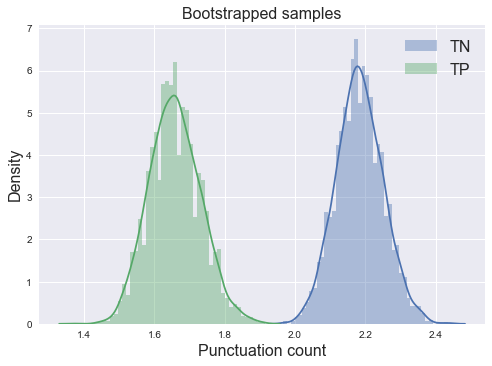

TN vs FN bootstrap: (-0.08384830782600305, 0.33358277410322024)


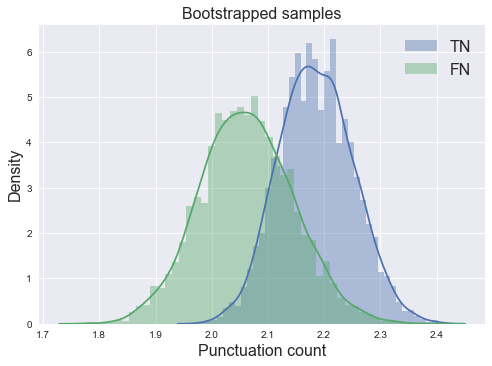

TN vs FP bootstrap: (0.24294525177424786, 0.6754182156133828)


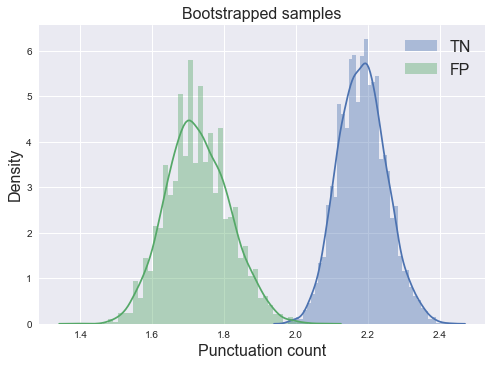

TP vs FN bootstrap: (-0.622077922077922, -0.17968460111317253)


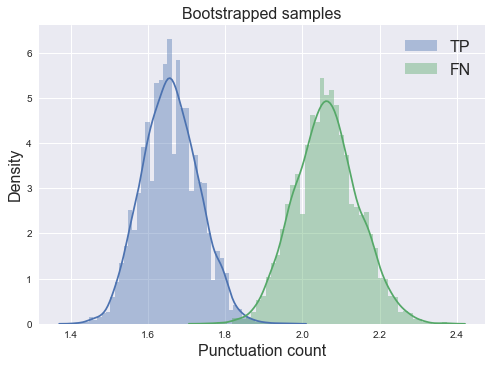

TP vs FP bootstrap: (-0.29292671614100185, 0.15658627087198518)


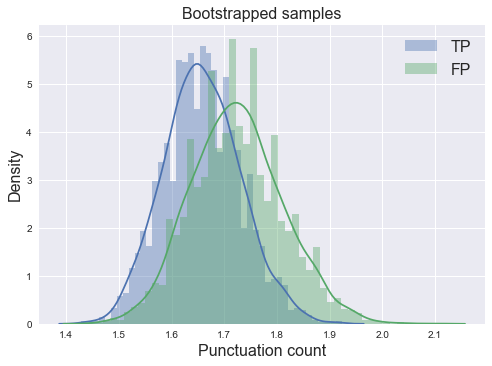

FN vs FP bootstrap: (0.10064935064935066, 0.5665584415584415)


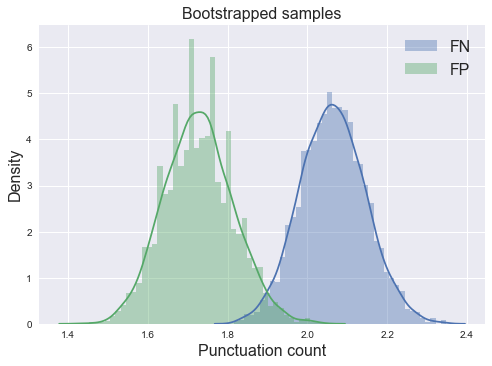

In [41]:
punctuation_bootstrap_analysis(liar_liar, "liar")

TN punctuation and commas frac: 9.249937152422238 4.98243333558154
TP punctuation and commas frac: 9.17155956468445 4.277645720322627
FN punctuation and commas frac: 8.79315659679408 4.438964241676942
FP punctuation and commas frac: 10.053585098239347 4.958747979926852
puntuation bootstrapping
TN vs TP bootstrap: (0.6160187034631175, 0.9417437869743459)


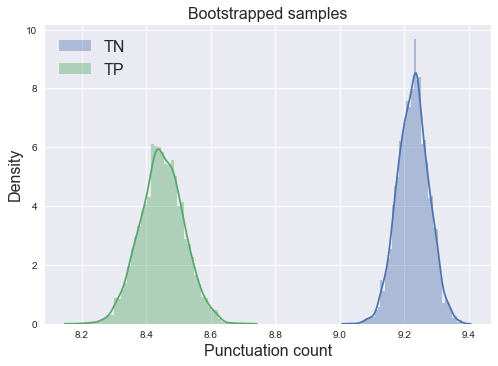

TN vs FN bootstrap: (0.05705778206985279, 1.2165137614678905)


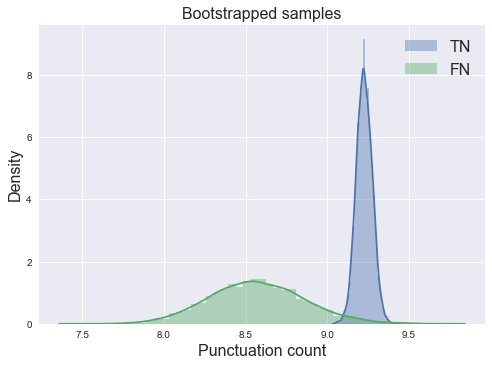

TN vs FP bootstrap: (-1.2814766273481872, -0.16847326086397807)


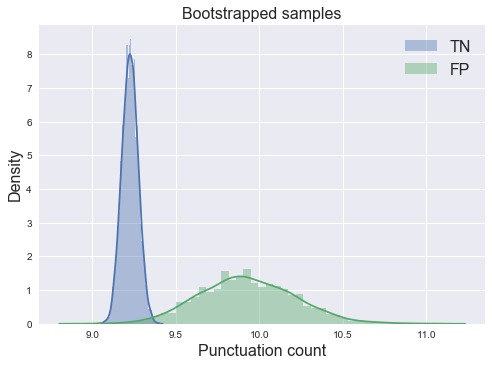

TP vs FN bootstrap: (-0.7116426437272221, 0.4544768033621178)


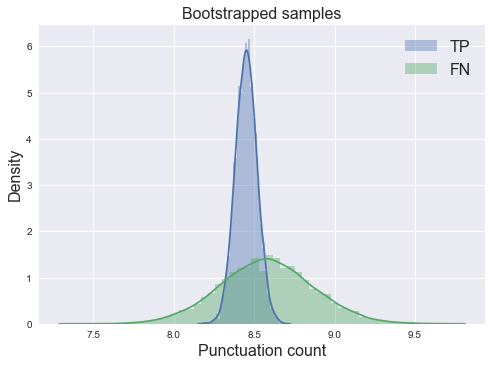

TP vs FP bootstrap: (-2.121848739495798, -0.945194671755166)


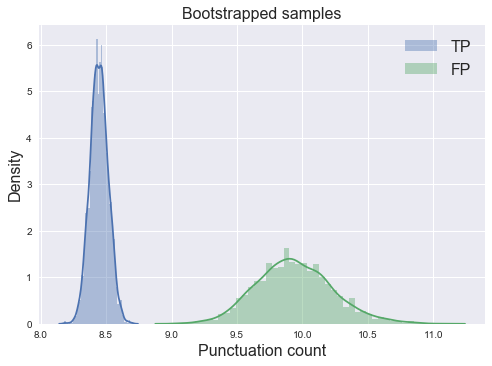

FN vs FP bootstrap: (-2.147722246793454, -0.5356037151702786)


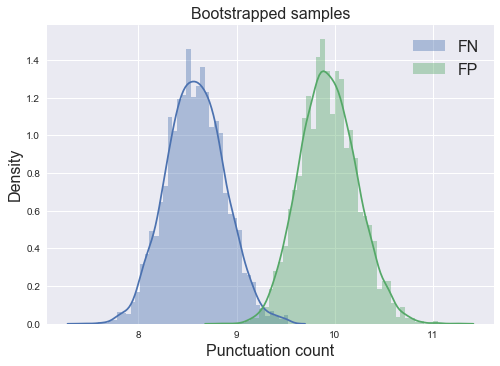

In [42]:
punctuation_bootstrap_analysis(kaggle_kaggle, "kaggle")

TN punctuation and commas frac: 10.025597269624575 2.901023890784983
TP punctuation and commas frac: 9.225176096341741 1.8404907975460123
FN punctuation and commas frac: 10.03318059725075 2.543845789224206
FP punctuation and commas frac: 9.809616005162956 2.452404001290739
TN length mean: 4.403242320819112
FP length mean: 4.606969990319458
FN length mean: 4.431031758571654
TP length mean: 4.606453078845717


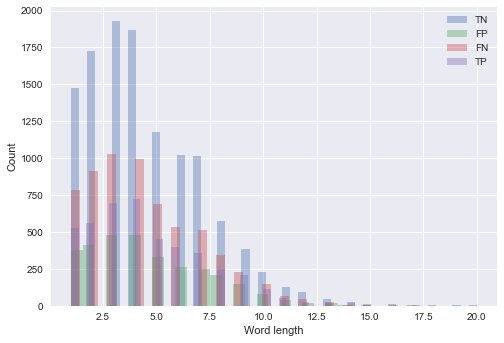

word length bootstrapping
TN vs TP bootstrap: (-0.29828306551489625, -0.10858098880722888)


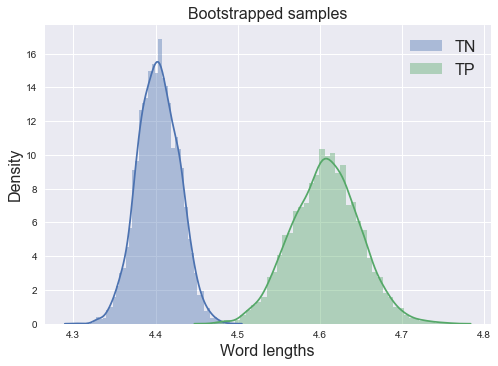

TN vs FN bootstrap: (-0.10907413568939095, 0.05515701330405509)


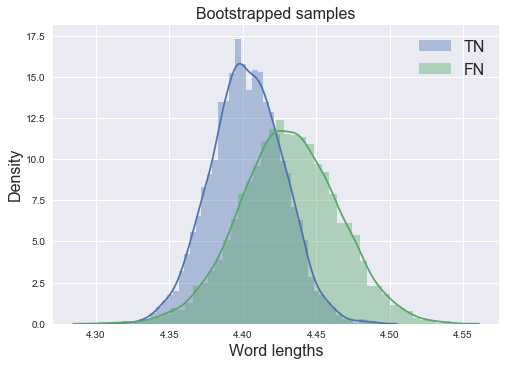

TN vs FP bootstrap: (-0.3127045276082674, -0.0899946255920927)


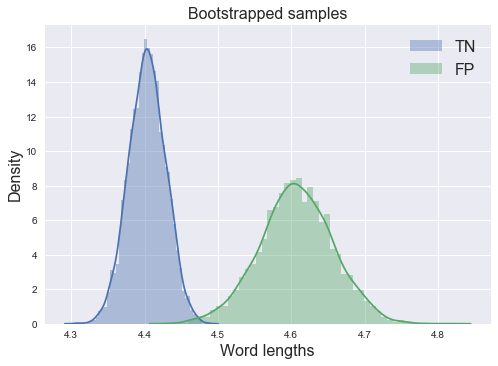

TP vs FN bootstrap: (0.07451810478873533, 0.27805247870058114)


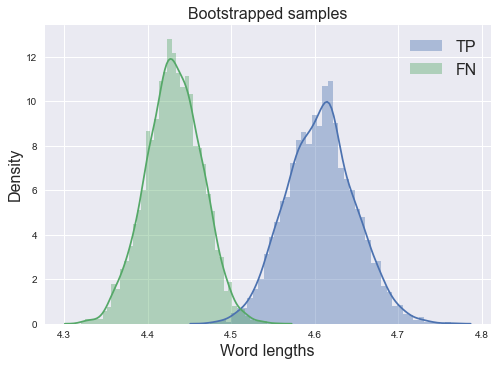

TP vs FP bootstrap: (-0.12841378785469182, 0.12839465113204707)


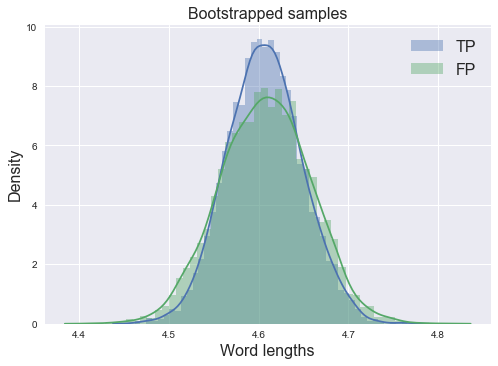

FN vs FP bootstrap: (-0.29408489662591286, -0.06239827515346352)


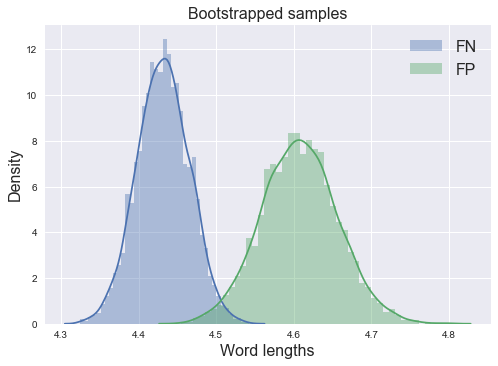

In [46]:

#liar_liar[(liar_liar.prediction==0)&(liar_liar.label==1)].text.apply(nltk.word_tokenize)
analysis(liar_liar, "liar")

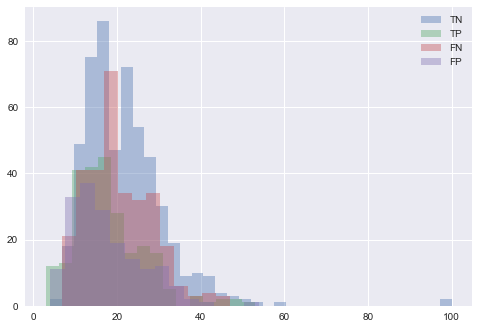

sentence length bootstrapping
TN vs TP bootstrap: (2.4615962370078144, 5.158493285790154)


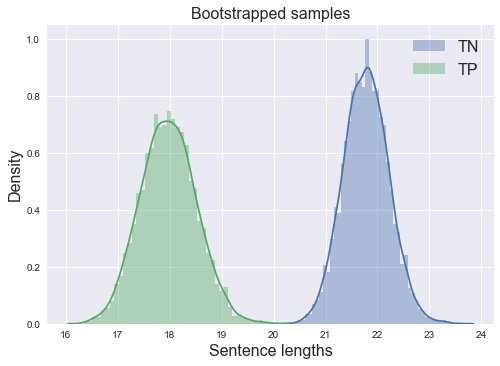

TN vs FN bootstrap: (0.0035967749722374265, 2.443972384492831)


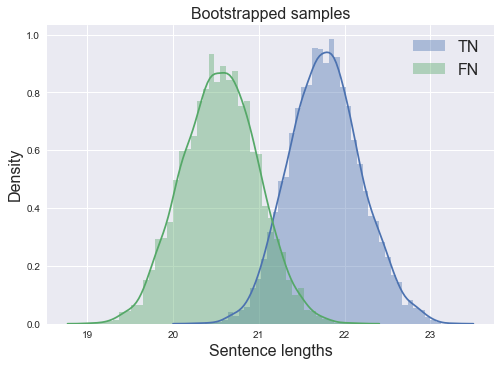

TN vs FP bootstrap: (2.698948124366339, 5.7178311929706)


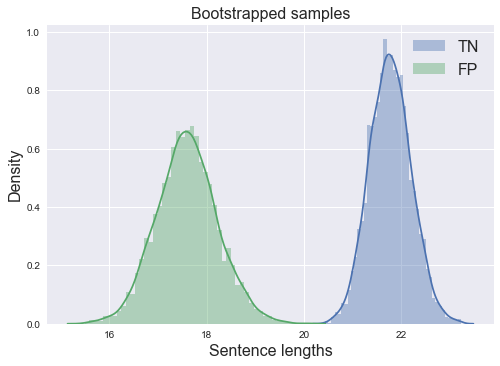

TP vs FN bootstrap: (-3.9475881261595553, -1.2208719851577001)


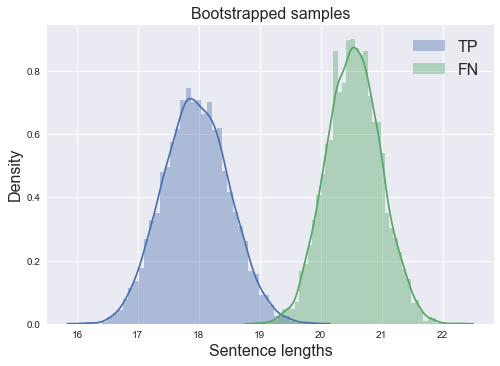

TP vs FP bootstrap: (-1.287175324675328, 1.9740491651205936)


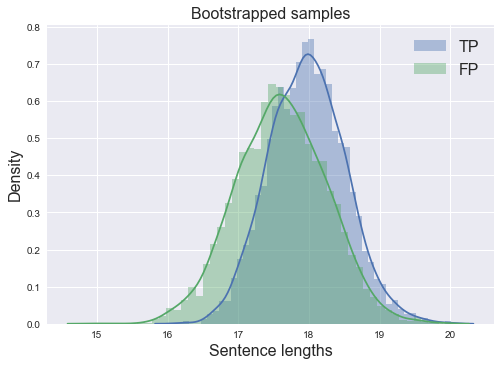

FN vs FP bootstrap: (1.4480519480519476, 4.4902597402597415)


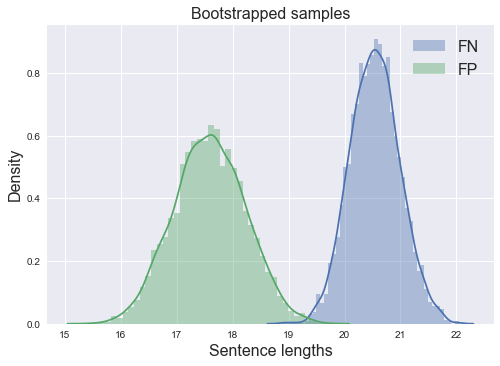

In [56]:
sent_length_bootstrap(liar_liar, "liar")

TN punctuation and commas frac: 0.0 0.0
TP punctuation and commas frac: 0.0 0.0
FN punctuation and commas frac: 0.0 0.0
FP punctuation and commas frac: 0.0 0.0
TN length mean: 4.545340045858556
FP length mean: 4.647117271530417
FN length mean: 4.622205680522924
TP length mean: 4.665676817536718


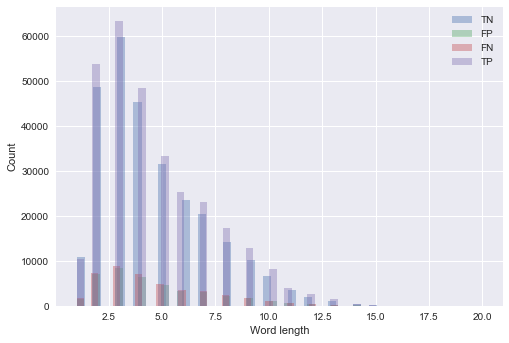

word length bootstrapping
TN vs TP bootstrap: (-0.13302866404778957, -0.1069564829433034)


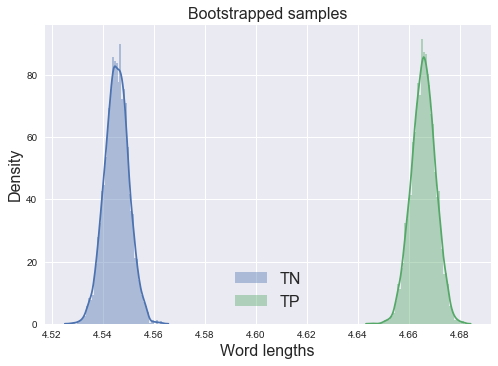

TN vs FN bootstrap: (-0.10213260977300909, -0.05127727846515828)


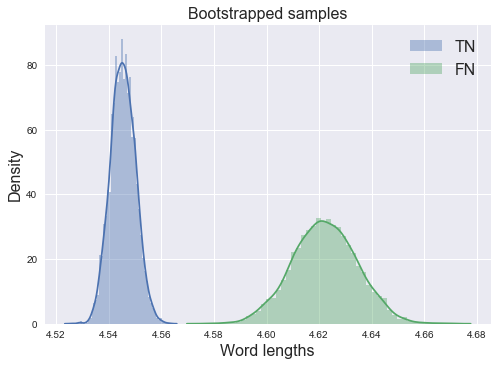

TN vs FP bootstrap: (-0.12831338518186275, -0.07451958357122201)


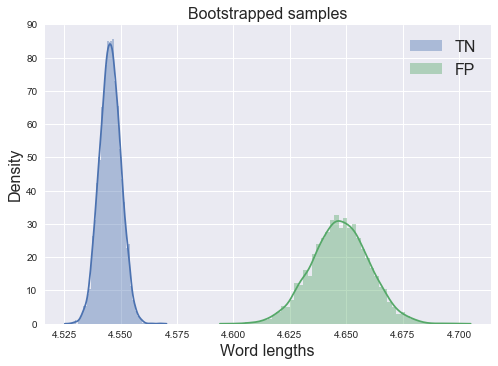

TP vs FN bootstrap: (0.01635778494100215, 0.06947504616791456)


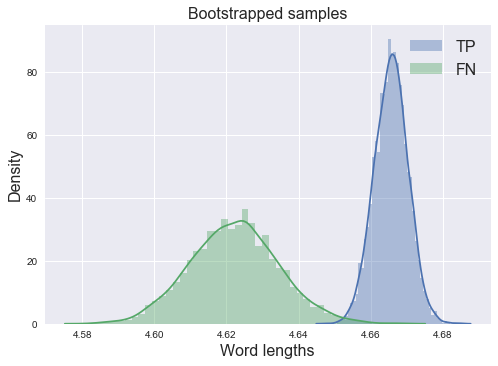

TP vs FP bootstrap: (-0.00784721436777236, 0.045388036776737195)


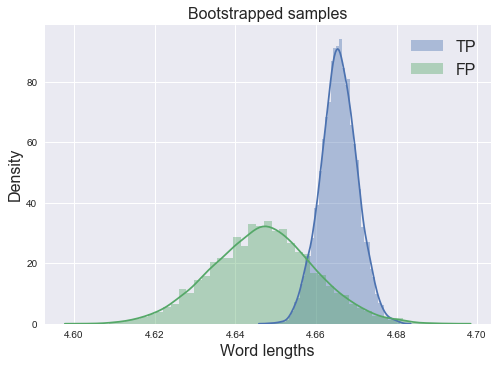

FN vs FP bootstrap: (-0.05825925334977544, 0.009723727914002112)


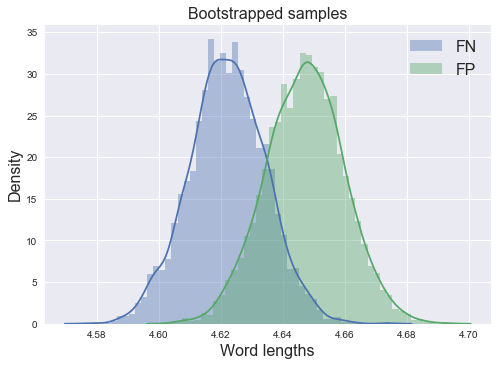

In [47]:
analysis(BS_BS, "BS")

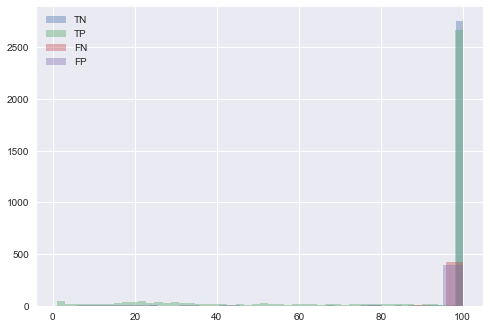

sentence length bootstrapping
TN vs TP bootstrap: (13.790199538682089, 15.737079003674168)


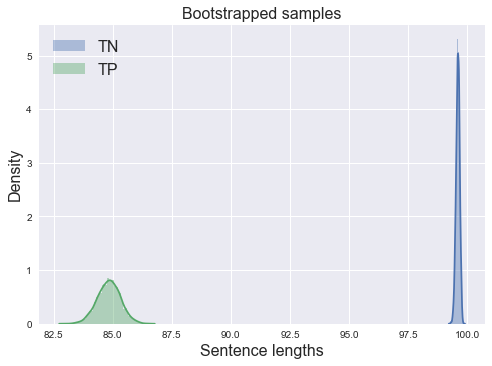

TN vs FN bootstrap: (-0.18193628903522097, 0.9602635997008662)


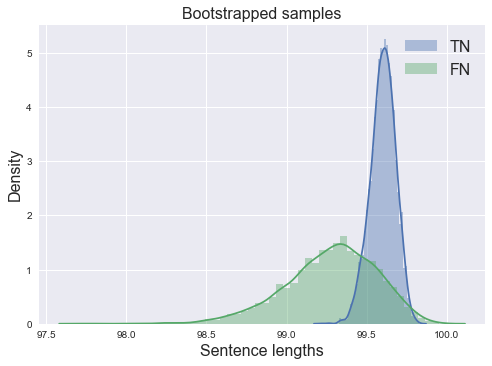

TN vs FP bootstrap: (4.107974134348453, 8.080715461209834)


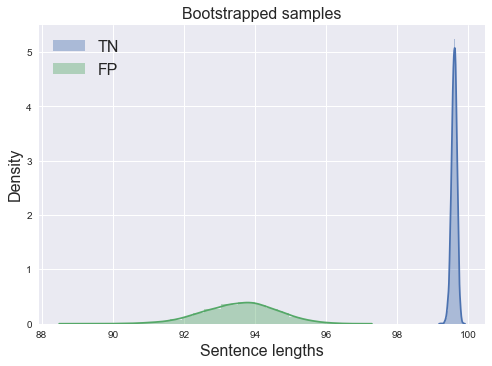

TP vs FN bootstrap: (-15.508988688997519, -13.350723924709769)


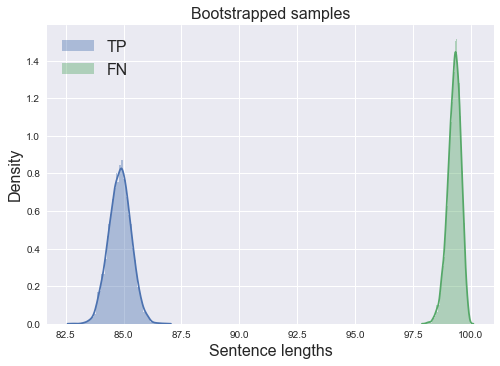

TP vs FP bootstrap: (-10.886711333005664, -6.533022479757861)


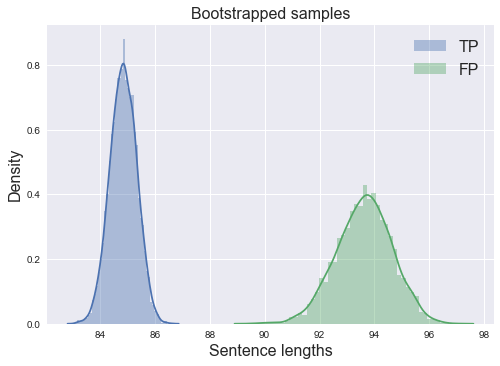

FN vs FP bootstrap: (3.678328589075676, 7.810005907943506)


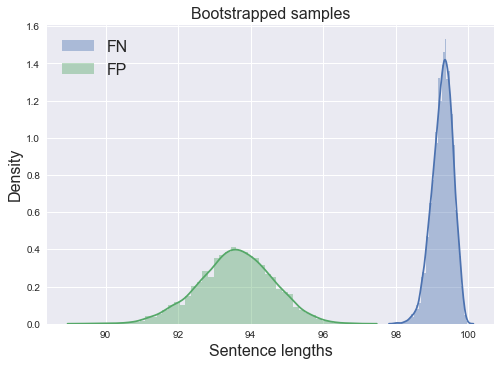

In [57]:
sent_length_bootstrap(BS_BS, "BS")

TN punctuation and commas frac: 9.249937152422238 4.98243333558154
TP punctuation and commas frac: 9.17155956468445 4.277645720322627
FN punctuation and commas frac: 8.79315659679408 4.438964241676942
FP punctuation and commas frac: 10.053585098239347 4.958747979926852
TN length mean: 4.309789506600529
FP length mean: 4.216807008590627
FN length mean: 4.449136868064119
TP length mean: 4.4887615719577685


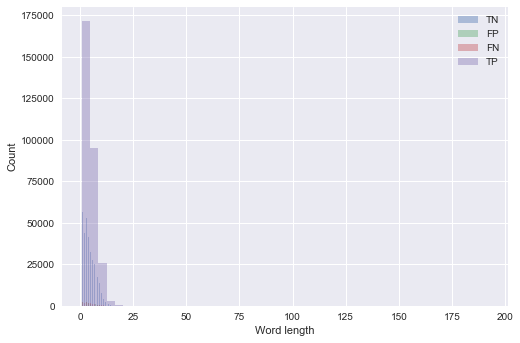

word length bootstrapping
TN vs TP bootstrap: (-0.19336526696260492, -0.16360937428671285)


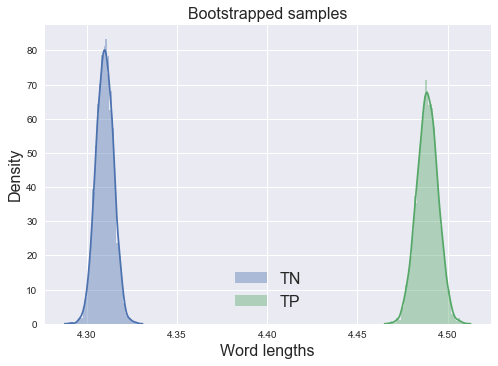

TN vs FN bootstrap: (-0.18833987874793046, -0.08955934677243427)


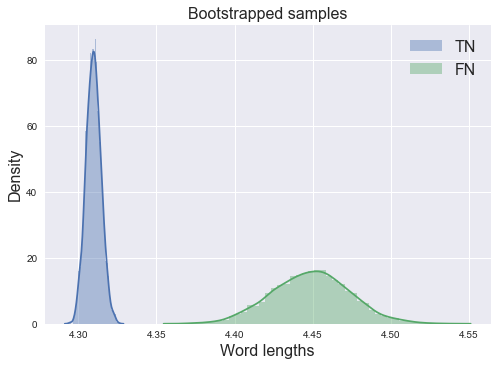

TN vs FP bootstrap: (0.04360912321184518, 0.14302404877816777)


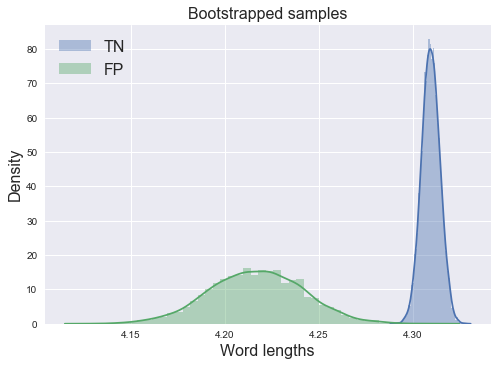

TP vs FN bootstrap: (-0.010196683377577287, 0.09017919239290251)


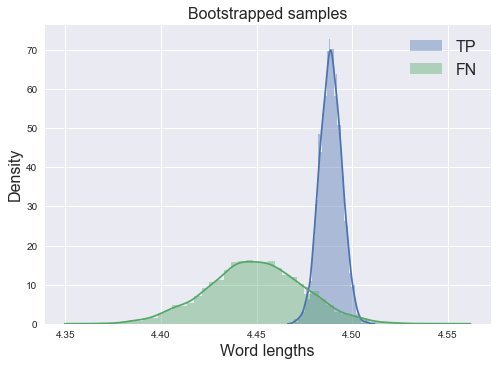

TP vs FP bootstrap: (0.22173914687367358, 0.3211424138628445)


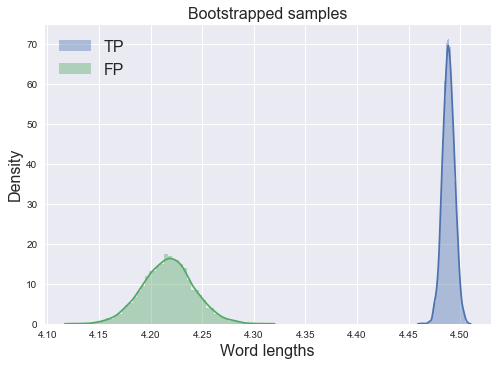

FN vs FP bootstrap: (0.16207445793764386, 0.3016980229633637)


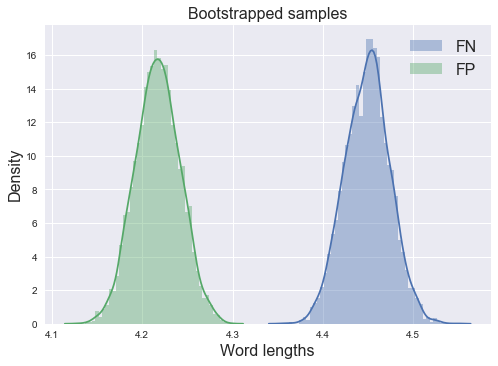

In [48]:
analysis(kaggle_kaggle, "kaggle")

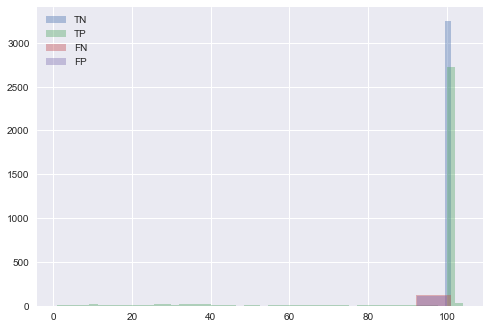

sentence length bootstrapping
TN vs TP bootstrap: (6.85022768852744, 8.418613036336694)


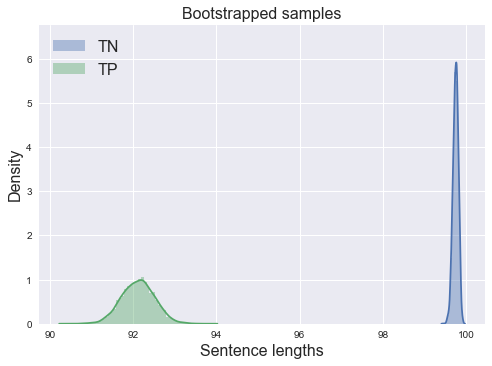

TN vs FN bootstrap: (0.1431859465176757, 4.7952242992803065)


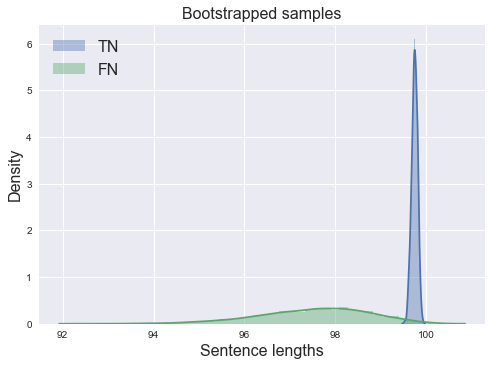

TN vs FP bootstrap: (-0.25932721712538864, 2.7619587284455065)


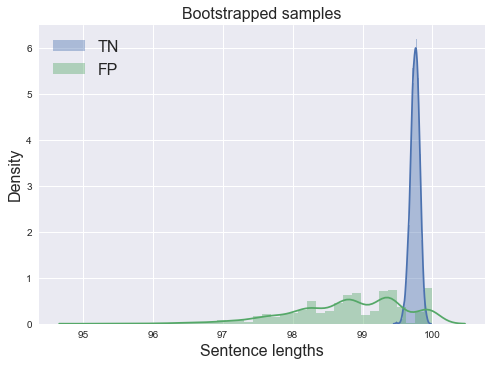

TP vs FN bootstrap: (-7.672636832255321, -2.8161998883672084)


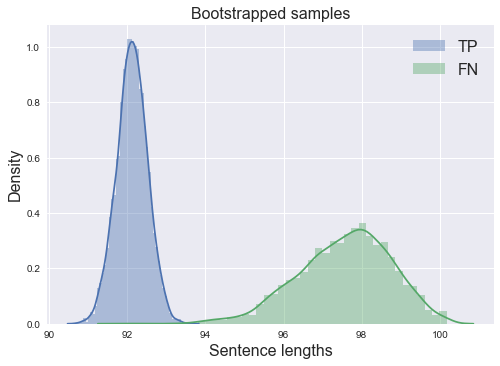

TP vs FP bootstrap: (-8.183699680745661, -4.740981982312576)


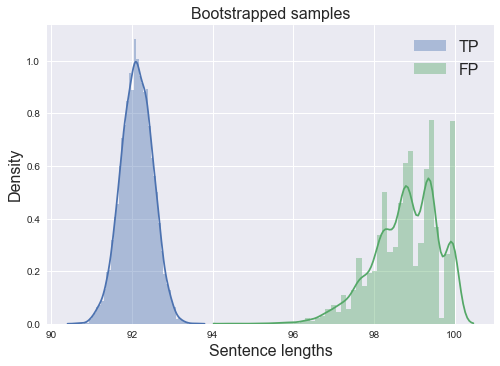

FN vs FP bootstrap: (-4.2153914197257905, 1.5028748341441798)


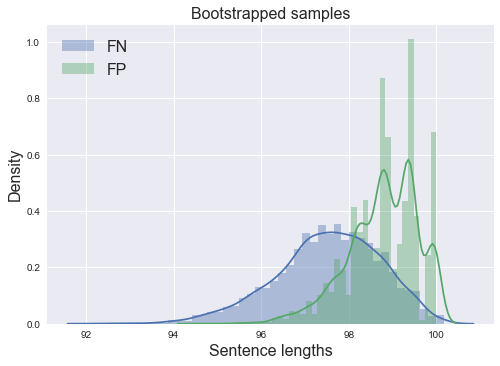

In [58]:
sent_length_bootstrap(kaggle_kaggle, "kaggle")

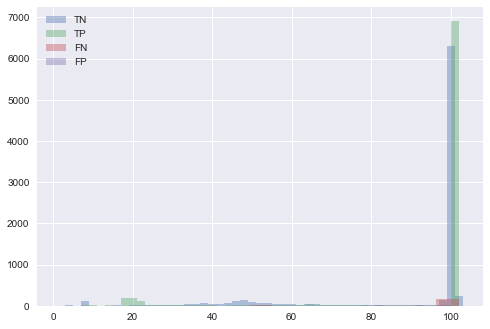

sentence length bootstrapping
TN vs TP bootstrap: (-2.387044045252466, -0.9540413753128263)


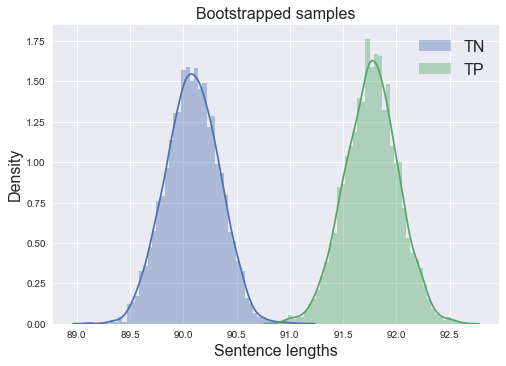

TN vs FN bootstrap: (-4.451434962395723, 0.7814327467181812)


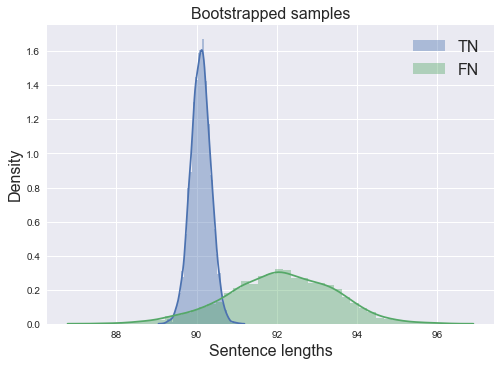

TN vs FP bootstrap: (-10.100171652770968, 9.374559191013333)


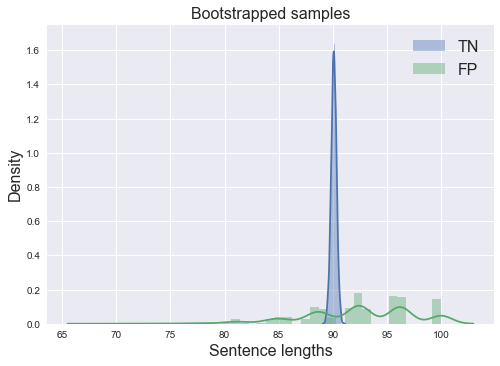

TP vs FN bootstrap: (-2.848410379167703, 2.266170754774734)


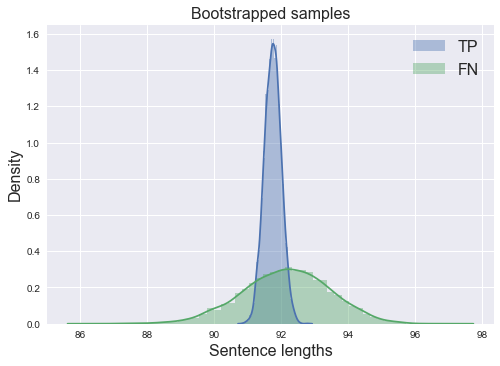

TP vs FP bootstrap: (-8.455451636721634, 11.09718950341643)


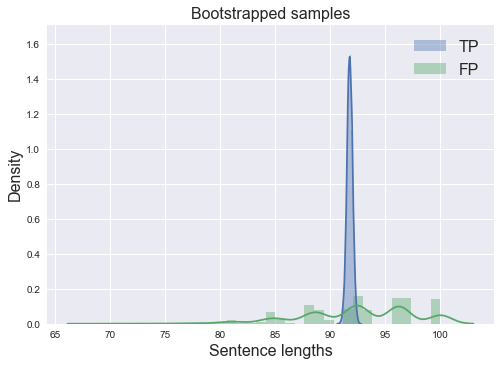

FN vs FP bootstrap: (-8.862944162436548, 11.319555233260814)


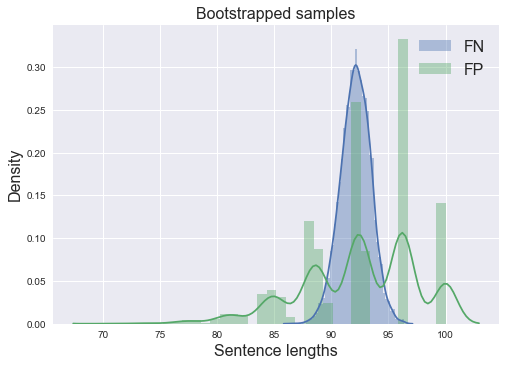

In [59]:
sent_length_bootstrap(FNC_FNC, "FNC")

TN punctuation and commas frac: 9.840610123543485 4.822795800773542
TP punctuation and commas frac: 12.626248402407017 3.092591325992117
FN punctuation and commas frac: 9.796683012838173 4.567744779326684
FP punctuation and commas frac: 8.706852138073158 4.121586810922205
TN length mean: 4.590311403616212
FP length mean: 4.125708397733128
FN length mean: 4.335059782908149
TP length mean: 4.445492742602792


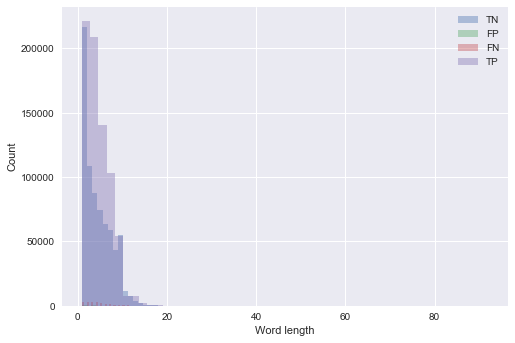

word length bootstrapping


In [ ]:
#analysis(FNC_FNC)